# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [79]:
# Load pickled data
import pickle
import numpy as np
import cv2
import matplotlib.pyplot as plt
import csv
# TODO: Fill this in based on where you saved the training and testing data

training_file = "/home/nishi/udacity/CarND-Traffic-Sign-Classifier-Project/train.p"
validation_file="/home/nishi/udacity/CarND-Traffic-Sign-Classifier-Project/valid.p"
testing_file = "/home/nishi/udacity/CarND-Traffic-Sign-Classifier-Project/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

# Example data
all_labels = []
#Select workbook
with open('signnames.csv', 'r') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        all_labels += [row[1]]

all_labels = all_labels[1:]
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

    
print("Updated Image Shape: {}".format(X_train[0].shape))

Updated Image Shape: (32, 32, 3)


In [70]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)
print(np.max(y_train))
print(np.min(y_train))

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)
42
0


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


Text(0.5, 1.0, 'Test data distribution')

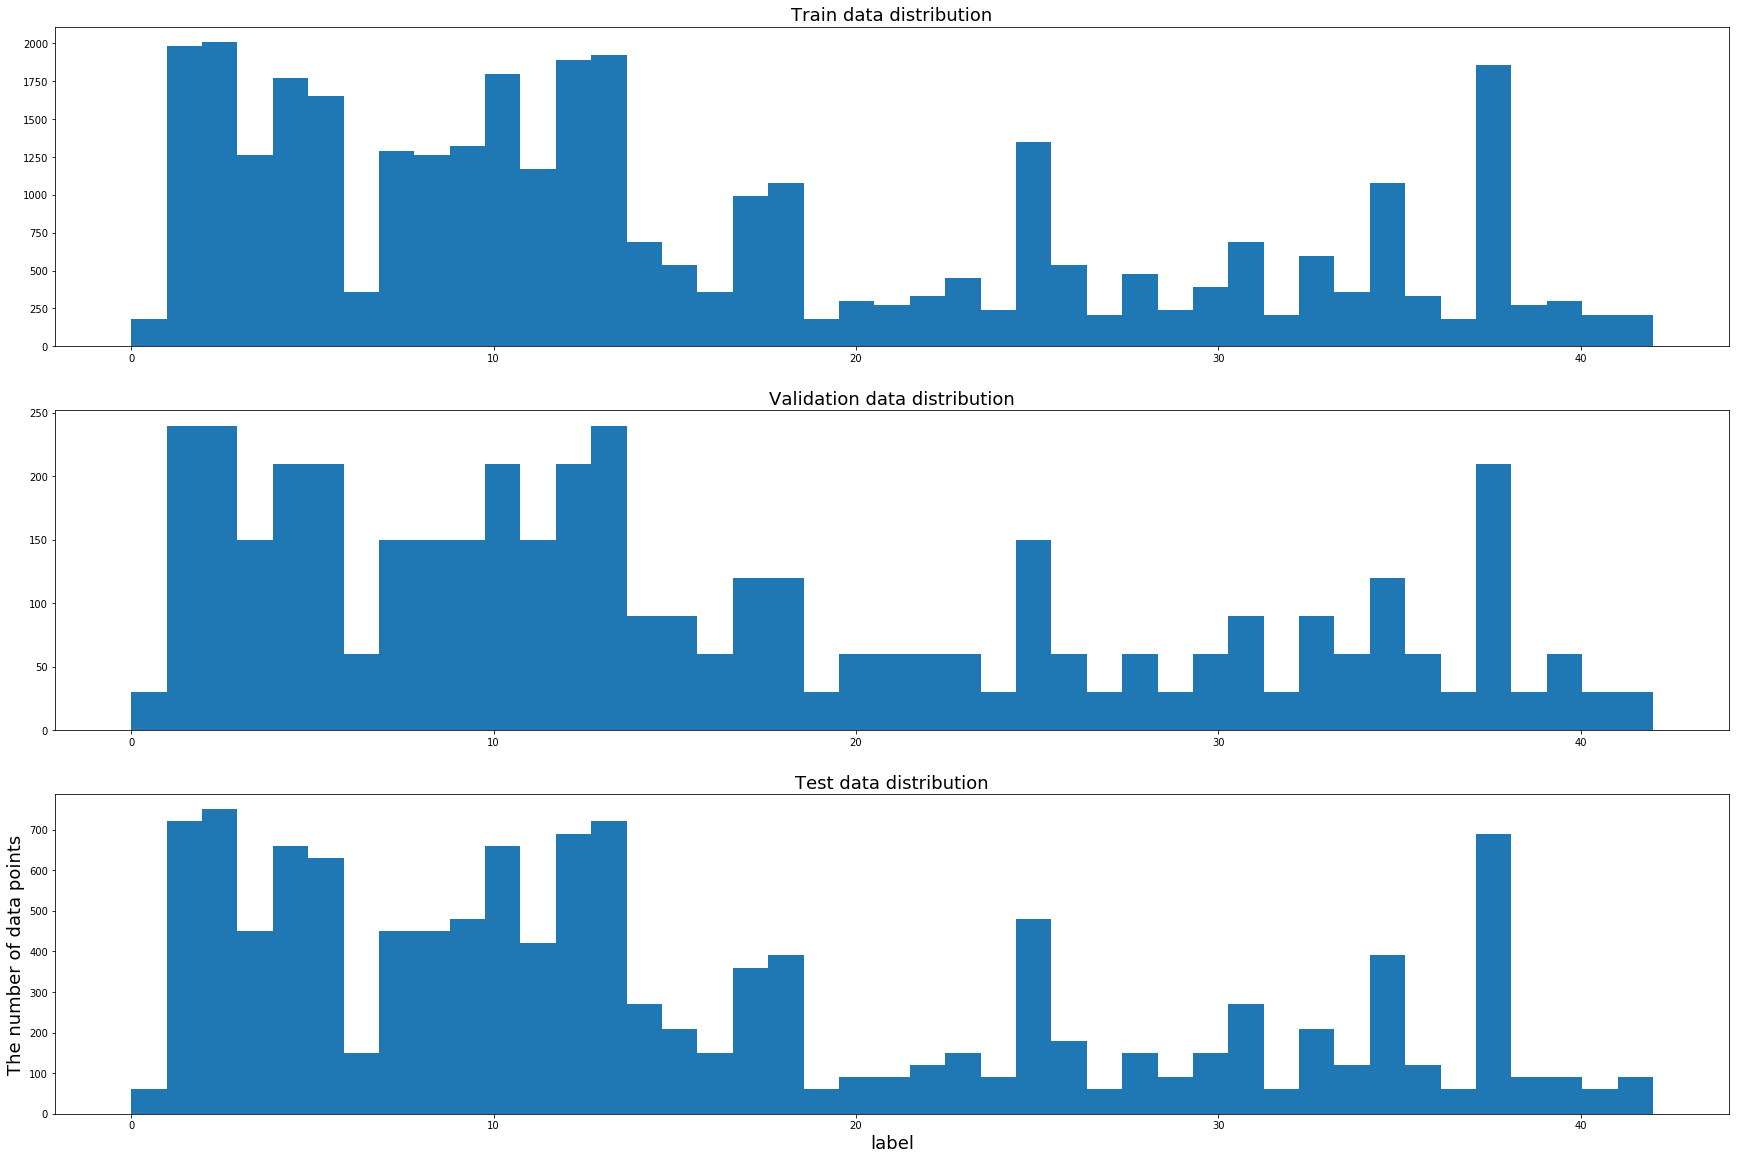

In [71]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_valid = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = (32,32)

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

f,axes = plt.subplots(nrows=3, ncols=1,figsize=(30,20))
axes[0].hist(y_train, bins=n_classes)
axes[0].set_title("Train data distribution",fontsize=18)
plt.xlabel('label',fontsize=18)
plt.ylabel('The number of data points',fontsize=18)
axes[1].hist(y_valid, bins=n_classes)
axes[1].set_title("Validation data distribution",fontsize=18)
axes[2].hist(y_test, bins=n_classes)
axes[2].set_title("Test data distribution",fontsize=18)


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

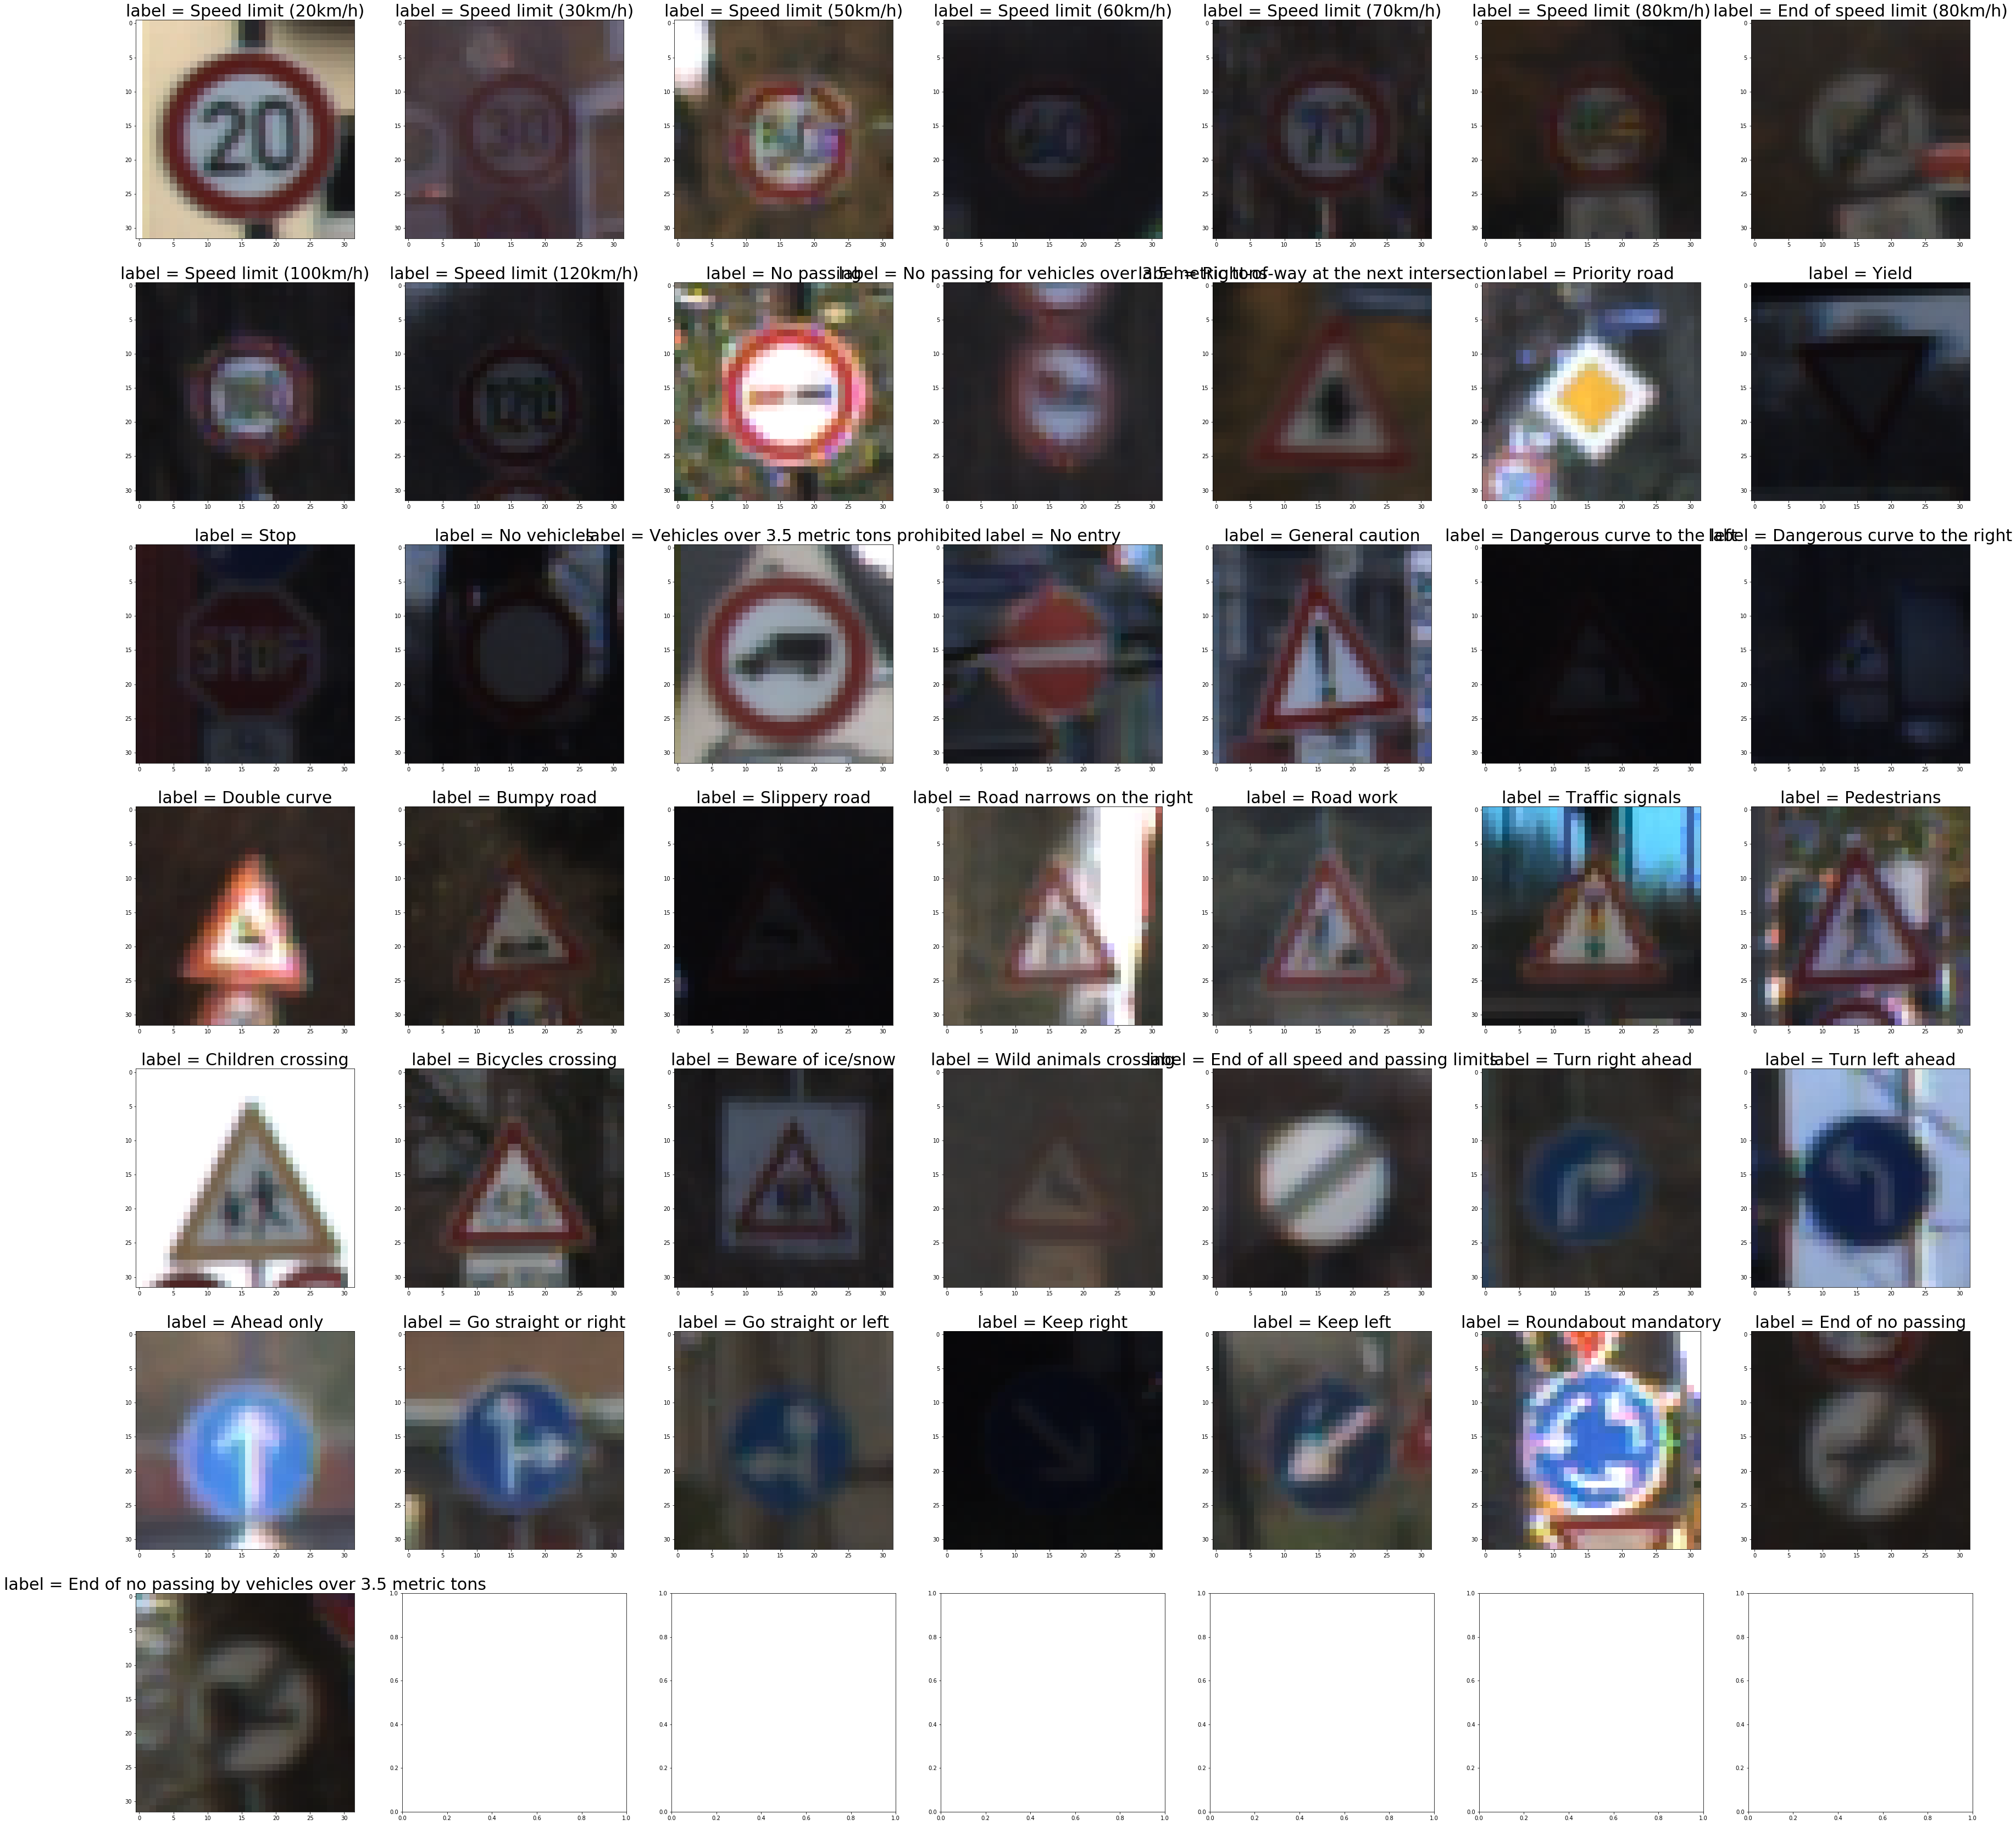

In [80]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
import matplotlib.image as mpimg
from PIL import Image
# Visualizations will be shown in the notebook.
%matplotlib inline


fig, axes = plt.subplots(nrows=7, ncols=n_classes//7+1,figsize=(60,60))
for i in range(n_classes):
    ind = np.min(np.where(y_train==i))
    image = X_train[ind].squeeze()
    axes[i//7][i%7].imshow(image)
    axes[i//7][i%7].set_title("label = {}".format(all_labels[i]),fontsize=30)
    
fig.savefig("examples.png")
    



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [51]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle

def pre_process(X,y):
    X_shuffled , y_shuffled = shuffle(X,y)
    # normalize the data
    X_normalized = (X_shuffled-[128])/128
    # rgb to gray
    X_processed = np.mean(X_normalized,axis=3).reshape((X.shape[0],X.shape[1],X.shape[2],1))
    # padding around edge
    X_processed = np.pad(X_processed, ((0,0),(2,2),(2,2),(0,0)), 'constant')
    return X_processed,y_shuffled
def pre_process_keep_rgb(X,y):
    X_shuffled , y_shuffled = shuffle(X,y)
    # normalize the data
    X_normalized = (X_shuffled-[128])/128
    # padding around edge
    X_processed = np.pad(X_normalized, ((0,0),(2,2),(2,2),(0,0)), 'constant')
    return X_processed,y_shuffled
"""
X,y=pre_process(X_train,y_train)
print(X.shape)
print(np.max(X))
"""

'\nX,y=pre_process(X_train,y_train)\nprint(X.shape)\nprint(np.max(X))\n'

In [52]:
## Tensorflow set up
import tensorflow as tf

# I use RTX series so following settings are necessary to avoid GPU error.
configure = tf.ConfigProto()
configure.gpu_options.allow_growth = True

# Hyper parametars
EPOCHS = 200
BATCH_SIZE = 128

### Model Architecture

In [72]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

# Set the mean and standard deviation value
mu = 0
sigma = 0.1

# Define standard conv2d-net

def conv2d(x, W, b, strides=1,padding='SAME'):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding=padding)
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

from tensorflow.contrib.layers import flatten
# configure LeNet as a reference.
def LeNet(x):    
    input_shape = x.shape.as_list()
    # Layer 1: Convolutional. Input = 36x36x1. Output = 32x32x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, input_shape[3], 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = conv2d(x, conv1_W,conv1_b, strides=1, padding='VALID')

    # Pooling. Input = 32x32x6. Output = 16x16x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 12x12x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = conv2d(conv1, conv2_W,conv2_b, strides=1, padding='VALID')

    # Pooling. Input = 12x12x16. Output = 6x6x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 6x6x16. Output = 576.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 576. Output = 172.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(576, 172), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(172))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 172. Output = 120.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(172, 120), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(120))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 120. Output = n_classes.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(120, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits



### Reconfigure CNN

Firstly,I show the result when I adopt LeNet.
(Hyper parameters are following value. EPOCHS = 200,BATCH_SIZE=128,learning_rate=0.0001)

[//]: # (Image References)

[first_trial_result]: ./figure_epoch200_rate_0.0001_batch128.png

![alt text][first_trial_result]

Accuracy and Loss are reach their peak around 25 epochs and since then it has fallen into overleaning.  
So 
#### I introduce Dropout mask.

Focusing on accuracy, its max value is about 0.85.
To reach minimum standard(accuracy=0.93) in this project, 
#### I add more convolutional layer to increase the expressiveness of the learning model.

Along with this, 
#### I introduce batch normalization to make learning progress smoothly.

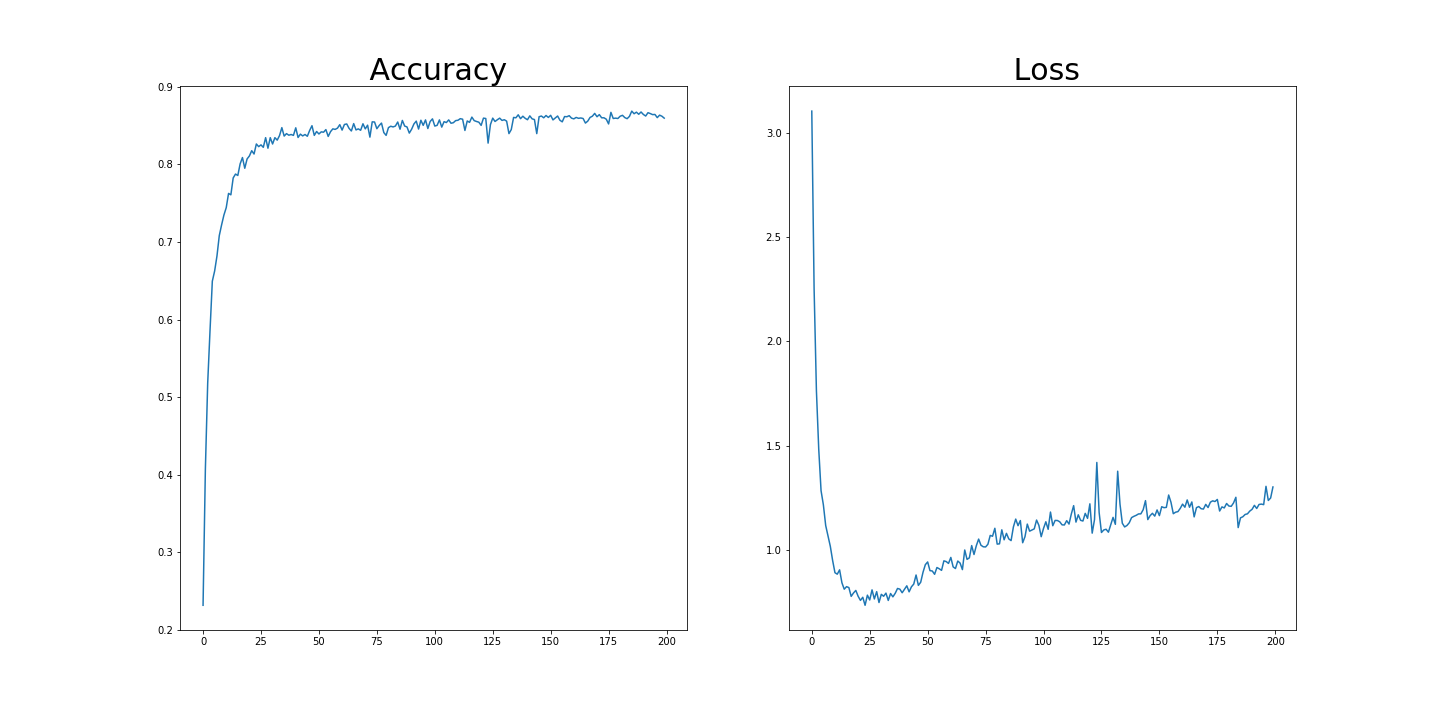

In [54]:
from IPython.display import Image, display_png
# png_file: str
display_png(Image('/home/nishi/udacity/CarND-Traffic-Sign-Classifier-Project/figure_epoch200_rate_0.0001_batch128.png'))


In [55]:
is_rgb = 1
n_classes = 43
# Set Constant Values
if is_rgb == 0:
    x = tf.placeholder(tf.float32, (None, 36, 36, 1))
else:
    x = tf.placeholder(tf.float32, (None, 36, 36, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

Training...
EPOCH 1 ...
Accuracy = 0.270
Cross entropy = 2.883
EPOCH 2 ...
Accuracy = 0.443
Cross entropy = 2.026
EPOCH 3 ...
Accuracy = 0.543
Cross entropy = 1.650
EPOCH 4 ...
Accuracy = 0.570
Cross entropy = 1.466
EPOCH 5 ...
Accuracy = 0.638
Cross entropy = 1.290
EPOCH 6 ...
Accuracy = 0.655
Cross entropy = 1.216
EPOCH 7 ...
Accuracy = 0.685
Cross entropy = 1.152
EPOCH 8 ...
Accuracy = 0.694
Cross entropy = 1.085
EPOCH 9 ...
Accuracy = 0.737
Cross entropy = 1.032
EPOCH 10 ...
Accuracy = 0.723
Cross entropy = 1.030
EPOCH 11 ...
Accuracy = 0.756
Cross entropy = 0.940
EPOCH 12 ...
Accuracy = 0.762
Cross entropy = 0.940
EPOCH 13 ...
Accuracy = 0.767
Cross entropy = 0.931
EPOCH 14 ...
Accuracy = 0.780
Cross entropy = 0.921
EPOCH 15 ...
Accuracy = 0.773
Cross entropy = 0.947
EPOCH 16 ...
Accuracy = 0.799
Cross entropy = 0.862
EPOCH 17 ...
Accuracy = 0.785
Cross entropy = 0.933
EPOCH 18 ...
Accuracy = 0.798
Cross entropy = 0.868
EPOCH 19 ...
Accuracy = 0.796
Cross entropy = 0.896
EPOCH 20 

EPOCH 158 ...
Accuracy = 0.852
Cross entropy = 1.398
EPOCH 159 ...
Accuracy = 0.851
Cross entropy = 1.397
EPOCH 160 ...
Accuracy = 0.859
Cross entropy = 1.265
EPOCH 161 ...
Accuracy = 0.858
Cross entropy = 1.320
EPOCH 162 ...
Accuracy = 0.858
Cross entropy = 1.326
EPOCH 163 ...
Accuracy = 0.859
Cross entropy = 1.334
EPOCH 164 ...
Accuracy = 0.860
Cross entropy = 1.351
EPOCH 165 ...
Accuracy = 0.864
Cross entropy = 1.340
EPOCH 166 ...
Accuracy = 0.844
Cross entropy = 1.459
EPOCH 167 ...
Accuracy = 0.849
Cross entropy = 1.399
EPOCH 168 ...
Accuracy = 0.857
Cross entropy = 1.404
EPOCH 169 ...
Accuracy = 0.858
Cross entropy = 1.401
EPOCH 170 ...
Accuracy = 0.859
Cross entropy = 1.394
EPOCH 171 ...
Accuracy = 0.856
Cross entropy = 1.417
EPOCH 172 ...
Accuracy = 0.859
Cross entropy = 1.395
EPOCH 173 ...
Accuracy = 0.851
Cross entropy = 1.449
EPOCH 174 ...
Accuracy = 0.852
Cross entropy = 1.315
EPOCH 175 ...
Accuracy = 0.856
Cross entropy = 1.355
EPOCH 176 ...
Accuracy = 0.857
Cross entropy =

EPOCH 313 ...
Accuracy = 0.866
Cross entropy = 1.458
EPOCH 314 ...
Accuracy = 0.865
Cross entropy = 1.465
EPOCH 315 ...
Accuracy = 0.865
Cross entropy = 1.484
EPOCH 316 ...
Accuracy = 0.866
Cross entropy = 1.484
EPOCH 317 ...
Accuracy = 0.867
Cross entropy = 1.486
EPOCH 318 ...
Accuracy = 0.867
Cross entropy = 1.501
EPOCH 319 ...
Accuracy = 0.872
Cross entropy = 1.454
EPOCH 320 ...
Accuracy = 0.856
Cross entropy = 1.543
EPOCH 321 ...
Accuracy = 0.861
Cross entropy = 1.476
EPOCH 322 ...
Accuracy = 0.860
Cross entropy = 1.480
EPOCH 323 ...
Accuracy = 0.862
Cross entropy = 1.477
EPOCH 324 ...
Accuracy = 0.863
Cross entropy = 1.484
EPOCH 325 ...
Accuracy = 0.863
Cross entropy = 1.498
EPOCH 326 ...
Accuracy = 0.863
Cross entropy = 1.501
EPOCH 327 ...
Accuracy = 0.863
Cross entropy = 1.509
EPOCH 328 ...
Accuracy = 0.863
Cross entropy = 1.511
EPOCH 329 ...
Accuracy = 0.862
Cross entropy = 1.527
EPOCH 330 ...
Accuracy = 0.863
Cross entropy = 1.529
EPOCH 331 ...
Accuracy = 0.864
Cross entropy =

EPOCH 468 ...
Accuracy = 0.871
Cross entropy = 1.578
EPOCH 469 ...
Accuracy = 0.867
Cross entropy = 1.441
EPOCH 470 ...
Accuracy = 0.862
Cross entropy = 1.498
EPOCH 471 ...
Accuracy = 0.865
Cross entropy = 1.479
EPOCH 472 ...
Accuracy = 0.866
Cross entropy = 1.479
EPOCH 473 ...
Accuracy = 0.868
Cross entropy = 1.487
EPOCH 474 ...
Accuracy = 0.869
Cross entropy = 1.486
EPOCH 475 ...
Accuracy = 0.869
Cross entropy = 1.489
EPOCH 476 ...
Accuracy = 0.869
Cross entropy = 1.493
EPOCH 477 ...
Accuracy = 0.869
Cross entropy = 1.499
EPOCH 478 ...
Accuracy = 0.870
Cross entropy = 1.505
EPOCH 479 ...
Accuracy = 0.869
Cross entropy = 1.515
EPOCH 480 ...
Accuracy = 0.870
Cross entropy = 1.516
EPOCH 481 ...
Accuracy = 0.870
Cross entropy = 1.518
EPOCH 482 ...
Accuracy = 0.871
Cross entropy = 1.529
EPOCH 483 ...
Accuracy = 0.870
Cross entropy = 1.537
EPOCH 484 ...
Accuracy = 0.871
Cross entropy = 1.540
EPOCH 485 ...
Accuracy = 0.871
Cross entropy = 1.540
EPOCH 486 ...
Accuracy = 0.871
Cross entropy =

EPOCH 623 ...
Accuracy = 0.871
Cross entropy = 1.552
EPOCH 624 ...
Accuracy = 0.871
Cross entropy = 1.560
EPOCH 625 ...
Accuracy = 0.871
Cross entropy = 1.568
EPOCH 626 ...
Accuracy = 0.872
Cross entropy = 1.571
EPOCH 627 ...
Accuracy = 0.871
Cross entropy = 1.583
EPOCH 628 ...
Accuracy = 0.870
Cross entropy = 1.587
EPOCH 629 ...
Accuracy = 0.871
Cross entropy = 1.591
EPOCH 630 ...
Accuracy = 0.872
Cross entropy = 1.592
EPOCH 631 ...
Accuracy = 0.872
Cross entropy = 1.609
EPOCH 632 ...
Accuracy = 0.872
Cross entropy = 1.608
EPOCH 633 ...
Accuracy = 0.872
Cross entropy = 1.610
EPOCH 634 ...
Accuracy = 0.872
Cross entropy = 1.620
EPOCH 635 ...
Accuracy = 0.873
Cross entropy = 1.635
EPOCH 636 ...
Accuracy = 0.872
Cross entropy = 1.640
EPOCH 637 ...
Accuracy = 0.873
Cross entropy = 1.648
EPOCH 638 ...
Accuracy = 0.872
Cross entropy = 1.651
EPOCH 639 ...
Accuracy = 0.858
Cross entropy = 1.611
EPOCH 640 ...
Accuracy = 0.860
Cross entropy = 1.674
EPOCH 641 ...
Accuracy = 0.876
Cross entropy =

EPOCH 778 ...
Accuracy = 0.876
Cross entropy = 1.661
EPOCH 779 ...
Accuracy = 0.877
Cross entropy = 1.665
EPOCH 780 ...
Accuracy = 0.876
Cross entropy = 1.675
EPOCH 781 ...
Accuracy = 0.875
Cross entropy = 1.677
EPOCH 782 ...
Accuracy = 0.876
Cross entropy = 1.682
EPOCH 783 ...
Accuracy = 0.876
Cross entropy = 1.688
EPOCH 784 ...
Accuracy = 0.876
Cross entropy = 1.699
EPOCH 785 ...
Accuracy = 0.877
Cross entropy = 1.703
EPOCH 786 ...
Accuracy = 0.875
Cross entropy = 1.715
EPOCH 787 ...
Accuracy = 0.875
Cross entropy = 1.715
EPOCH 788 ...
Accuracy = 0.876
Cross entropy = 1.718
EPOCH 789 ...
Accuracy = 0.874
Cross entropy = 1.734
EPOCH 790 ...
Accuracy = 0.852
Cross entropy = 2.177
EPOCH 791 ...
Accuracy = 0.868
Cross entropy = 1.621
EPOCH 792 ...
Accuracy = 0.868
Cross entropy = 1.652
EPOCH 793 ...
Accuracy = 0.868
Cross entropy = 1.663
EPOCH 794 ...
Accuracy = 0.868
Cross entropy = 1.669
EPOCH 795 ...
Accuracy = 0.868
Cross entropy = 1.674
EPOCH 796 ...
Accuracy = 0.868
Cross entropy =

EPOCH 933 ...
Accuracy = 0.875
Cross entropy = 1.743
EPOCH 934 ...
Accuracy = 0.875
Cross entropy = 1.746
EPOCH 935 ...
Accuracy = 0.875
Cross entropy = 1.747
EPOCH 936 ...
Accuracy = 0.875
Cross entropy = 1.750
EPOCH 937 ...
Accuracy = 0.875
Cross entropy = 1.756
EPOCH 938 ...
Accuracy = 0.875
Cross entropy = 1.758
EPOCH 939 ...
Accuracy = 0.875
Cross entropy = 1.759
EPOCH 940 ...
Accuracy = 0.876
Cross entropy = 1.760
EPOCH 941 ...
Accuracy = 0.875
Cross entropy = 1.765
EPOCH 942 ...
Accuracy = 0.875
Cross entropy = 1.768
EPOCH 943 ...
Accuracy = 0.876
Cross entropy = 1.772
EPOCH 944 ...
Accuracy = 0.876
Cross entropy = 1.774
EPOCH 945 ...
Accuracy = 0.876
Cross entropy = 1.781
EPOCH 946 ...
Accuracy = 0.875
Cross entropy = 1.783
EPOCH 947 ...
Accuracy = 0.876
Cross entropy = 1.786
EPOCH 948 ...
Accuracy = 0.876
Cross entropy = 1.793
EPOCH 949 ...
Accuracy = 0.876
Cross entropy = 1.797
EPOCH 950 ...
Accuracy = 0.877
Cross entropy = 1.805
EPOCH 951 ...
Accuracy = 0.877
Cross entropy =

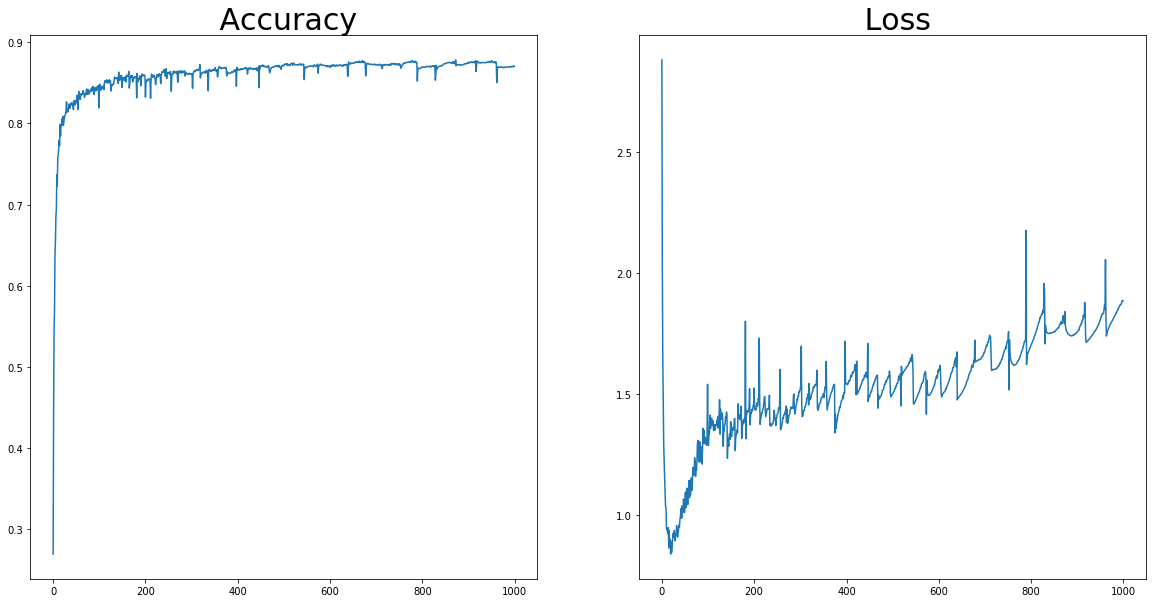

In [73]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

rate = 0.0001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
# to save result
saver = tf.train.Saver()

# Model Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
def evaluation(X_eval,y_eval,is_rgb=0):
    sess = tf.get_default_session()
    total_ac = 0
    total_loss = 0
    ### gray_ver ###
    if is_rgb == 0:
        X_processed , y_processed = pre_process(X_eval,y_eval)
    #endif
    ################
    ### rgb_ver ###
    else:
        X_processed , y_processed = pre_process_keep_rgb(X_eval,y_eval)
    #endif
    ###############
    for offset in range(0, len(X_eval), BATCH_SIZE):
        end = offset + BATCH_SIZE
        batch_x, batch_y = X_processed[offset:end], y_processed[offset:end]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        loss     = sess.run(cross_entropy,feed_dict={x: batch_x, y: batch_y})
        mean_loss = np.mean(loss)
        total_ac += (accuracy * len(batch_x))
        total_loss += (mean_loss * len(batch_x)) 
    return total_ac/len(X_eval),total_loss/len(X_eval)
with tf.Session(config=configure) as sess:
    sess.run(tf.global_variables_initializer())
    print("Training...")
    accuracy_array = np.zeros((EPOCHS))
    loss_array = np.zeros((EPOCHS))
    for i in range(EPOCHS):
        if ((i > 10) & ((accuracy_array[i-1]-np.max(accuracy_array)) < -0.05)):
            break
        ### gray_ver ###
        if is_rgb == 0:
            X_train_processed , y_train_processed = pre_process( X_train,y_train)
        #endif
        ################
        ### rgb_ver ###
        else:
            X_train_processed , y_train_processed = pre_process_keep_rgb(X_train,y_train)
        #endif
        ###############
        for offset in range(0,n_train,BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_processed[offset:end],y_train_processed[offset:end]
            sess.run(training_operation, feed_dict={x:batch_x, y:batch_y})

        print("EPOCH {} ...".format(i+1))
        valid_ac,valid_loss = evaluation(X_valid, y_valid,is_rgb)
        accuracy_array[i] = valid_ac
        loss_array[i] =valid_loss
        print("Accuracy = {:.3f}".format(valid_ac))
        print("Cross entropy = {:.3f}".format(valid_loss))

    saver.save(sess, './lenet_is_rgb{0}'.format(is_rgb))

    if is_rgb==0:
        f_1, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,10))
        ax1.plot(accuracy_array)
        ax1.set_title(' Accuracy', fontsize=30)
        ax2.plot(loss_array)
        ax2.set_title(' Loss', fontsize=30)
        f_1.savefig('figure_epoch{0}_rate_{1}_batch{2}_is_rgb{3}.png'.format(EPOCHS,rate,BATCH_SIZE,is_rgb))
        print("Model saved")
    if is_rgb==1:
        f_2, (ax3, ax4) = plt.subplots(1, 2,figsize=(20,10))
        ax3.plot(accuracy_array)
        ax3.set_title(' Accuracy', fontsize=30)
        ax4.plot(loss_array)
        ax4.set_title(' Loss', fontsize=30)
        f_2.savefig('figure_epoch{0}_rate_{1}_batch{2}_is_rgb{3}.png'.format(EPOCHS,rate,BATCH_SIZE,is_rgb))
        print("Model saved")
        
    

In [57]:
# Reconfigure CNN

# Set the mean and standard deviation value
mu = 0
sigma = 0.1
n_classes = 43
# Define standard conv2d-net
from tensorflow.contrib.layers import flatten
def conv2d(x, W, b, strides=1,padding='SAME'):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding=padding)
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)
# introduce batch normalization after convolution  
keep_prob_1 = tf.placeholder(tf.float32)
keep_prob_2 = tf.placeholder(tf.float32)
def self_difined_CNN_last_ver_(x,keep_prob_1,keep_prob_2): 
    input_shape = x.shape.as_list()
    W = {
        "conv1_W" : tf.Variable(tf.truncated_normal(shape=(5, 5, input_shape[3], 16), mean = mu, stddev = sigma)),
        "conv2_W" : tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 32), mean = mu, stddev = sigma)),
        "conv3_W" : tf.Variable(tf.truncated_normal(shape=(5, 5, 32, 80), mean = mu, stddev = sigma)),
        "fc1_W" : tf.Variable(tf.truncated_normal(shape=(1280, 300), mean = mu, stddev = sigma)),
        "fc2_W" : tf.Variable(tf.truncated_normal(shape=(300, 100), mean = mu, stddev = sigma)),
        "fc3_W" : tf.Variable(tf.truncated_normal(shape=(100, n_classes), mean = mu, stddev = sigma)),
    }


    b = {
        "conv1_b" : tf.Variable(tf.zeros(16)),
        "conv2_b" : tf.Variable(tf.zeros(32)),
        "conv3_b" : tf.Variable(tf.zeros(80)),
        "fc1_b" : tf.Variable(tf.zeros(300)),
        "fc2_b"  : tf.Variable(tf.zeros(100)),
        "fc3_b"  : tf.Variable(tf.zeros(n_classes)),
    }

    scale = {
        "batch1_scale" : tf.Variable(tf.ones(16)),
        "batch2_scale" : tf.Variable(tf.ones(32)),
        "batch3_scale" : tf.Variable(tf.ones(80)),
    }

    offset = {
        "batch1_offset" : tf.Variable(tf.zeros(16)),
        "batch2_offset" : tf.Variable(tf.zeros(32)),
        "batch3_offset" : tf.Variable(tf.zeros(80)),
    }

    
    
    
    # Layer 1: Convolutional. Input = 36x36x1. Output = 32x32x16.
    conv1   = conv2d(x, W["conv1_W"],b["conv1_b"], strides=1, padding='VALID')
    # Batch normalization
    conv1 = tf.nn.batch_normalization(conv1, 0, 1, offset["batch1_offset"], scale["batch1_scale"], 1e-8)
    # Pooling. Input = 32x32x8. Output = 16x16x8.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    # Drop out mask
    conv1 = tf.nn.dropout(conv1, keep_prob_1)
        
        
        
    # Layer 2: Convolutional. Output = 12x12x32.   
    conv2   = conv2d(conv1,  W["conv2_W"],b["conv2_b"], strides=1, padding='VALID')
    # Batch normalization
    conv2 = tf.nn.batch_normalization(conv2, 0, 1, offset["batch2_offset"], scale["batch2_scale"], 1e-8)
    # Drop out mask
    #conv2 = tf.nn.dropout(conv2, keep_prob_2)
    
    # Layer 3: Convolutional. Output = 8x8x80.
    conv3   = conv2d(conv2, W["conv3_W"],b["conv3_b"], strides=1, padding='VALID')
    
    # Batch normalization
    conv3 = tf.nn.batch_normalization(conv3, 0, 1, offset["batch3_offset"], scale["batch3_scale"], 1e-8)

    # Pooling. Input = 8x8x64. Output = 4x4x80.
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Drop out mask
    #conv3 = tf.nn.dropout(conv3, keep_prob_2)

    # Flatten. Input = 4x4x80. Output = 1280.
    fc0   = flatten(conv3)
    
    # Layer 4: Fully Connected. Input = 1280. Output = 300.
    fc1   = tf.matmul(fc0, W["fc1_W"]) + b["fc1_b"]
    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    
    # Drop out mask
    fc1 = tf.nn.dropout(fc1, keep_prob_2)

    # Layer 5: Fully Connected. Input = 300. Output = 200.
    fc2    = tf.matmul(fc1, W["fc2_W"]) + b["fc2_b"]
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    # Drop out mask
    #fc2 = tf.nn.dropout(fc2, keep_prob_2)
    
    # Layer 6: Fully Connected. Input = 100. Output = n_classes.
    logits = tf.matmul(fc2, W["fc3_W"]) + b["fc3_b"]
    
    return logits

Training...
EPOCH 1 ...
Accuracy = 0.225
Cross entropy = 3.068
EPOCH 2 ...
Accuracy = 0.368
Cross entropy = 2.257
EPOCH 3 ...
Accuracy = 0.495
Cross entropy = 1.746
EPOCH 4 ...
Accuracy = 0.579
Cross entropy = 1.396
EPOCH 5 ...
Accuracy = 0.655
Cross entropy = 1.159
EPOCH 6 ...
Accuracy = 0.708
Cross entropy = 0.976
EPOCH 7 ...
Accuracy = 0.732
Cross entropy = 0.867
EPOCH 8 ...
Accuracy = 0.765
Cross entropy = 0.774
EPOCH 9 ...
Accuracy = 0.795
Cross entropy = 0.701
EPOCH 10 ...
Accuracy = 0.810
Cross entropy = 0.616
EPOCH 11 ...
Accuracy = 0.829
Cross entropy = 0.598
EPOCH 12 ...
Accuracy = 0.839
Cross entropy = 0.561
EPOCH 13 ...
Accuracy = 0.840
Cross entropy = 0.537
EPOCH 14 ...
Accuracy = 0.862
Cross entropy = 0.505
EPOCH 15 ...
Accuracy = 0.871
Cross entropy = 0.463
EPOCH 16 ...
Accuracy = 0.874
Cross entropy = 0.475
EPOCH 17 ...
Accuracy = 0.872
Cross entropy = 0.470
EPOCH 18 ...
Accuracy = 0.884
Cross entropy = 0.427
EPOCH 19 ...
Accuracy = 0.888
Cross entropy = 0.449
EPOCH 20 

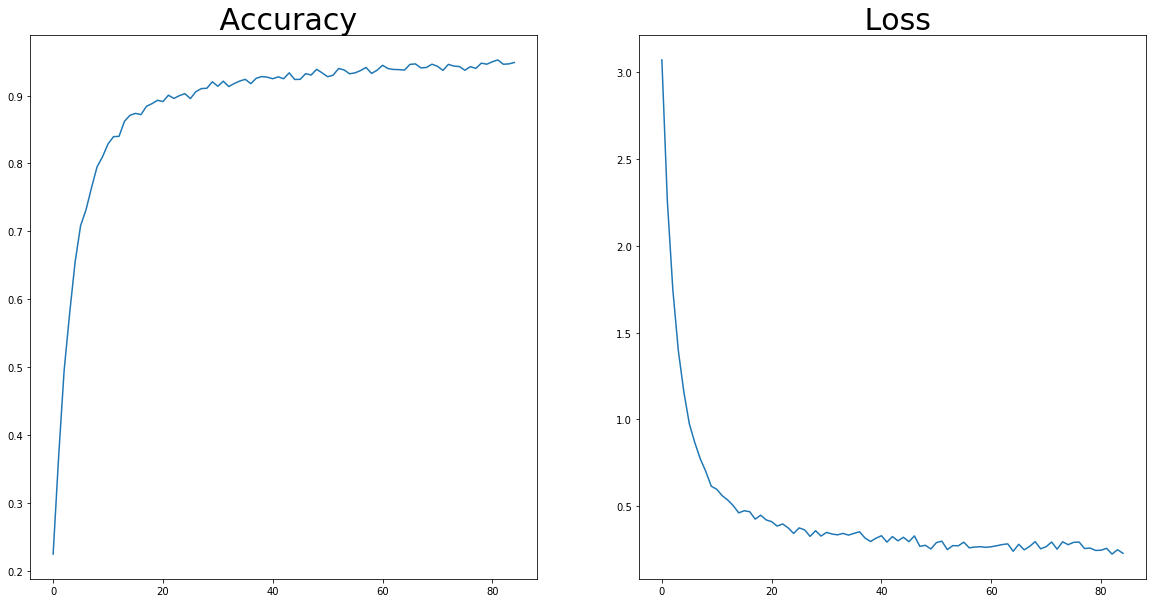

In [59]:
# Self difined CNN , no data augumentation

### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

rate = 0.0001
EPOCHS = 1000
logits = self_difined_CNN_last_ver_(x,keep_prob_1,keep_prob_2)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# Model Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
def evaluation(X_eval,y_eval,is_rgb=0):
    sess = tf.get_default_session()
    total_ac = 0
    total_loss = 0
    ### gray_ver ###
    if is_rgb == 0:
        X_processed , y_processed = pre_process(X_eval,y_eval)
    #endif
    ################
    ### rgb_ver ###
    else:
        X_processed , y_processed = pre_process_keep_rgb(X_eval,y_eval)
    #endif
    ###############
    for offset in range(0, len(X_eval), BATCH_SIZE):
        end = offset + BATCH_SIZE
        batch_x, batch_y = X_processed[offset:end], y_processed[offset:end]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,keep_prob_1:0.8,keep_prob_2:0.5})
        loss     = sess.run(cross_entropy,feed_dict={x: batch_x, y: batch_y,keep_prob_1:0.8,keep_prob_2:0.5})
        mean_loss = np.mean(loss)
        total_ac += (accuracy * len(batch_x))
        total_loss += (mean_loss * len(batch_x)) 
    return total_ac/len(X_eval),total_loss/len(X_eval)
with tf.Session(config=configure) as sess:
    sess.run(tf.global_variables_initializer())
    # to save result
    saver = tf.train.Saver(max_to_keep=100)
    print("Training...")
    accuracy_array = np.zeros((EPOCHS))
    loss_array = np.zeros((EPOCHS))
    for i in range(EPOCHS):
        if i>200:
            if ((accuracy_array[i-1]-np.max(accuracy_array)) < -0.02):
                break
            elif ((np.max(accuracy_array[i-21:i-1])-np.max(accuracy_array[i-41:i-21])) <= 0.0):
                break
            #endif
        #endif
        ### gray_ver ###
        if is_rgb == 0:
            X_train_processed , y_train_processed = pre_process( X_train,y_train)
        #endif
        ################
        ### rgb_ver ###
        else:
            X_train_processed , y_train_processed = pre_process_keep_rgb(X_train,y_train)
        #endif
        ###############
        for offset in range(0,n_train,BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_processed[offset:end],y_train_processed[offset:end]
            sess.run(training_operation, feed_dict={x:batch_x, y:batch_y,keep_prob_1:0.8,keep_prob_2:0.5})

        print("EPOCH {} ...".format(i+1))
        valid_ac,valid_loss = evaluation(X_valid, y_valid,is_rgb)
        accuracy_array[i] = valid_ac
        loss_array[i] =valid_loss
        print("Accuracy = {:.3f}".format(valid_ac))
        print("Cross entropy = {:.3f}".format(valid_loss))
        saver.save(sess, './self_difined_CNN_is_rgb{0}_{1}th_epoch'.format(is_rgb,i+1))
    #endfor
    
    #save best model.

    #endwith
    ind = np.argmax(accuracy_array)

    print("Best epoch is {0}".format(ind+1))
    saver.restore(sess,'./self_difined_CNN_is_rgb{0}_{1}th_epoch'.format(is_rgb,ind+1))
    

    valid_ac,valid_loss = evaluation(X_valid, y_valid,is_rgb)
    saver.save(sess, './self_difined_CNN_is_rgb{0}'.format(is_rgb))
    print("Best Model Accuracy = {:.3f}".format(valid_ac))


    if is_rgb==0:
        f_1, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,10))
        ax1.plot(accuracy_array[:ind])
        ax1.set_title(' Accuracy', fontsize=30)
        ax2.plot(loss_array[:ind])
        ax2.set_title(' Loss', fontsize=30)
        f_1.savefig('self_difined_CNN_figure_epoch{0}_rate_{1}_batch{2}_is_rgb{3}.png'.format(EPOCHS,rate,BATCH_SIZE,is_rgb))
        print("Model saved")
    if is_rgb==1:
        f_2, (ax3, ax4) = plt.subplots(1, 2,figsize=(20,10))
        ax3.plot(accuracy_array[:ind])
        ax3.set_title(' Accuracy', fontsize=30)
        ax4.plot(loss_array[:ind])
        ax4.set_title(' Loss', fontsize=30)
        f_2.savefig('self_difined_CNN_figure_epoch{0}_rate_{1}_batch{2}_is_rgb{3}.png'.format(EPOCHS,rate,BATCH_SIZE,is_rgb))
        print("Model saved")

In [60]:
with tf.Session(config=configure) as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver(max_to_keep=100)
    saver.restore(sess,'./self_difined_CNN_is_rgb1')
    train_ac,train_loss = evaluation(X_train, y_train,is_rgb)
    print("Train data Accuracy : {0}".format(train_ac))
    print("Train data Loss : {0}".format(train_loss))
    valid_ac,valid_loss = evaluation(X_valid, y_valid,is_rgb)
    print("Valid data Accuracy : {0}".format(valid_ac))
    print("Valid data Loss : {0}".format(valid_loss))
    test_ac,test_loss = evaluation(X_test, y_test,is_rgb)
    print("Test data Accuracy : {0}".format(test_ac))
    print("Test data Loss : {0}".format(test_loss))
    saver.save(sess, './self_difined_CNN_is_rgb{0}'.format(is_rgb))

INFO:tensorflow:Restoring parameters from ./self_difined_CNN_is_rgb1
Train data Accuracy : 0.996551625063825
Train data Loss : 0.009962989950633595
Valid data Accuracy : 0.9555555558258714
Valid data Loss : 0.24865494944881691
Test data Accuracy : 0.9315122721786077
Test data Loss : 0.43521432563697926


In [61]:
with tf.Session(config=configure) as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver(max_to_keep=100)
    saver.restore(sess,'./self_difined_CNN_is_rgb1')
    train_ac,train_loss = evaluation(X_train, y_train,is_rgb)
    print("Train data Accuracy : {0}".format(train_ac))
    print("Train data Loss : {0}".format(train_loss))
    valid_ac,valid_loss = evaluation(X_valid, y_valid,is_rgb)
    print("Valid data Accuracy : {0}".format(valid_ac))
    print("Valid data Loss : {0}".format(valid_loss))
    test_ac,test_loss = evaluation(X_test, y_test,is_rgb)
    print("Test data Accuracy : {0}".format(test_ac))
    print("Test data Loss : {0}".format(test_loss))
    saver.save(sess, './self_difined_CNN_is_rgb{0}'.format(is_rgb))

INFO:tensorflow:Restoring parameters from ./self_difined_CNN_is_rgb1
Train data Accuracy : 0.9966090979625851
Train data Loss : 0.009704074710015533
Valid data Accuracy : 0.9541950116352159
Valid data Loss : 0.2365020233487326
Test data Accuracy : 0.930720506796078
Test data Loss : 0.442388205290407


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

['/home/nishi/udacity/CarND-Traffic-Sign-Classifier-Project/new_image_from_web_site/image_1.jpg'
 '/home/nishi/udacity/CarND-Traffic-Sign-Classifier-Project/new_image_from_web_site/image_2.jpg'
 '/home/nishi/udacity/CarND-Traffic-Sign-Classifier-Project/new_image_from_web_site/image_3.jpg'
 '/home/nishi/udacity/CarND-Traffic-Sign-Classifier-Project/new_image_from_web_site/image_4.jpg'
 '/home/nishi/udacity/CarND-Traffic-Sign-Classifier-Project/new_image_from_web_site/image_5.jpg'
 '/home/nishi/udacity/CarND-Traffic-Sign-Classifier-Project/new_image_from_web_site/image_6.jpg'
 '/home/nishi/udacity/CarND-Traffic-Sign-Classifier-Project/new_image_from_web_site/image_7.jpg']
7
(1, 32, 32, 3)
(1, 32, 32, 3)
(1, 32, 32, 3)
(1, 32, 32, 3)
(1, 32, 32, 3)
(1, 32, 32, 3)
(1, 32, 32, 3)
(7, 32, 32, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


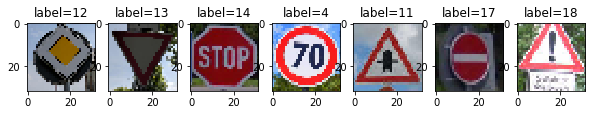

In [62]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import glob
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image
# Visualizations will be shown in the notebook.
%matplotlib inline
file_name = '/home/nishi/udacity/CarND-Traffic-Sign-Classifier-Project/new_image_from_web_site/new_image_label.txt'
labels = np.array([])
with open(file_name) as f:
    for line in f.readlines():
        for label in line.split():
             labels = np.append(labels, int(label))
        #Endfor
    #endfor
#endwith
n_image = len(labels)
image_dir_name = "/home/nishi/udacity/CarND-Traffic-Sign-Classifier-Project/new_image_from_web_site/"
image_file_names=np.array([])
for i in range(len(labels)):
    image_file_names = np.append(image_file_names,image_dir_name+"image_{0}.jpg".format(i+1))
print(image_file_names)
print(len(image_file_names))

for i in range(n_image):
    image = Image.open(image_file_names[i])
    image = np.array(image.resize((32,32)))
    image = image.reshape(1,32,32,3).astype(np.uint8)
    print(image.shape)
    if i == 0:
        new_images = image
    else:
        new_images = np.concatenate((new_images,image),axis=0)
print(new_images.shape)
f,ax = plt.subplots(nrows=1,ncols=n_image,figsize=(10,10))
for i in range(n_image):
    print(type(ax))
    ax[i].imshow(new_images[i])
    ax[i].set_title("label={0}".format(int(labels[i])))
#endfor

### Predict the Sign Type for Each Image

In [63]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.


## data preprocess
### gray_ver ###
if is_rgb == 0:
    X_processed , y_processed = pre_process(new_images,labels)
#endif
################
### rgb_ver ###
else:
    X_processed , y_processed = pre_process_keep_rgb(new_images,labels)
#endif
###############
with tf.Session(config=configure) as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver(max_to_keep=100)
    saver.restore(sess,'./self_difined_CNN_is_rgb1')
    train_ac,train_loss = evaluation(new_images,labels,is_rgb)
    logit= sess.run(logits,feed_dict={x:X_processed,keep_prob_1:0.8,keep_prob_2:0.5})
    logit = sess.run(tf.nn.softmax(logit))
    matrix = sess.run(tf.nn.top_k(logit, k=5))
    print(logit.shape)
    predict_result = sess.run(tf.argmax(logit, 1))
    print("Result of prediction is \n", predict_result)
    print(predict_result)
    answer = y_processed.astype(int)
    print(y_processed)
    result = (predict_result==answer)
    print(result)
    print('accuracy:',train_ac,'\n loss:',train_loss)
    print(matrix)
    saver.save(sess, './self_difined_CNN_is_rgb{0}'.format(is_rgb))

INFO:tensorflow:Restoring parameters from ./self_difined_CNN_is_rgb1
(7, 43)
Result of prediction is 
 [36 14 17 13  1 12 11]
[36 14 17 13  1 12 11]
[ 4. 14. 17. 13. 18. 12. 11.]
[False  True  True  True False  True  True]
accuracy: 0.7142857313156128 
 loss: 4.285414695739746
TopKV2(values=array([[9.9975818e-01, 2.4074038e-04, 8.3301330e-07, 2.2955652e-07,
        2.8079581e-08],
       [1.0000000e+00, 5.3267796e-11, 1.3191917e-12, 7.5104331e-14,
        7.0822463e-17],
       [1.0000000e+00, 1.8689247e-21, 2.6582098e-24, 3.2248111e-25,
        6.7003448e-26],
       [1.0000000e+00, 1.8330553e-22, 4.9816486e-26, 1.3149288e-27,
        5.4225819e-28],
       [9.9977428e-01, 2.2407115e-04, 9.7184352e-07, 3.3927253e-07,
        1.3555993e-07],
       [1.0000000e+00, 1.3606152e-09, 6.9172570e-11, 6.9991083e-13,
        2.7545953e-13],
       [1.0000000e+00, 3.8381984e-19, 3.4851004e-23, 1.4062016e-24,
        2.2946406e-26]], dtype=float32), indices=array([[36,  0, 15, 18,  1],
       [14

### Analyze Performance

In [64]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
accuracy_percentage = np.array(result).astype(int).sum(axis=0)/len(result) * 100
print("Accuracy = {0}%".format(accuracy_percentage))

Accuracy = 71.42857142857143%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [19]:
print(np.array(matrix).shape)

(2, 7, 5)


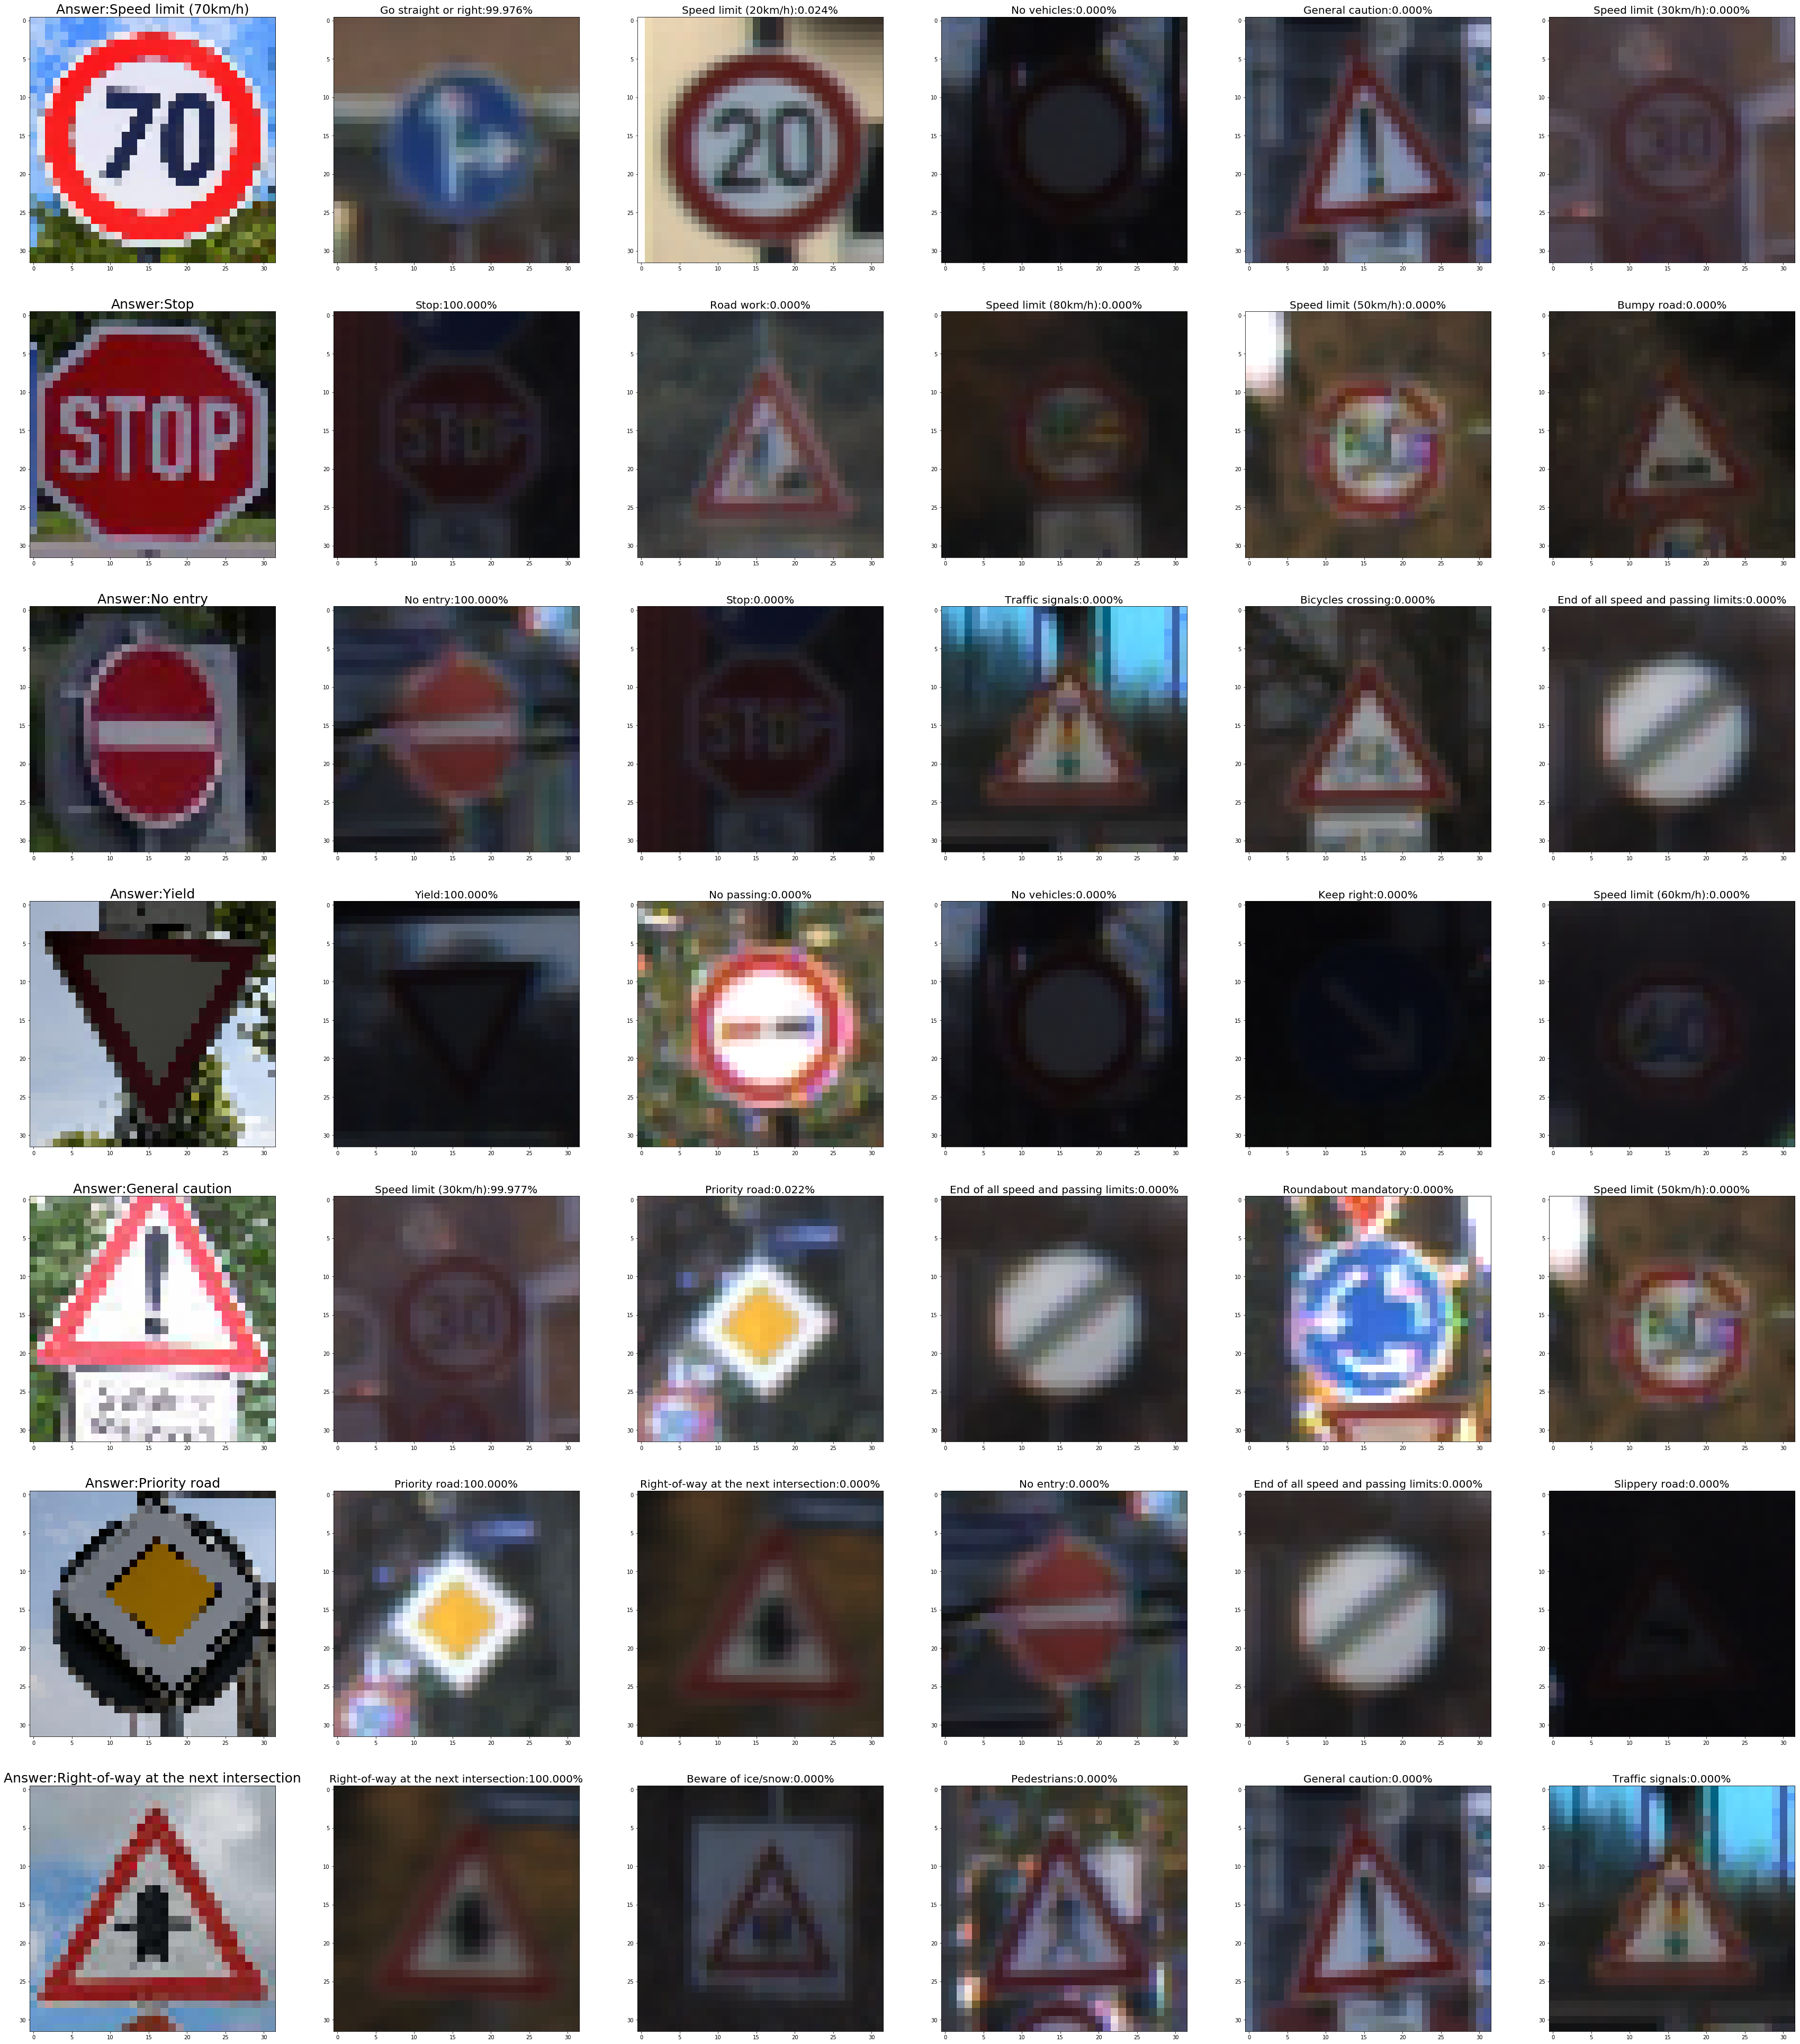

In [82]:
matrix = np.array(matrix)
f,axes = plt.subplots(nrows=matrix.shape[1],ncols=6,figsize=(60,70))
for i in range(matrix.shape[1]):
    base_ind = np.where(np.array(labels)==int(y_processed[i]))
    base_ind = base_ind[0][0]
    axes[i][0].imshow(new_images[base_ind])
    axes[i][0].set_title("Answer:{0}".format(all_labels[int(y_processed[i])]),fontsize=25)
    for j in range(1,6,1):
        ind = np.min(np.where(y_train==matrix[1,i,j-1]))
        axes[i][j].imshow(X_train[ind])
        axes[i][j].set_title("{0}:{1:.3f}%".format(all_labels[int(matrix[1,i,j-1])],float(matrix[0,i,j-1]*100)),fontsize=20)
f.savefig("prediction_test_result.png")
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [21]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    with tf.Session(config=configure) as sess:
        sess.run(tf.global_variables_initializer())
        saver = tf.train.Saver(max_to_keep=100)
        saver.restore(sess,'./self_difined_CNN_is_rgb1')
        activation = tf_activation.eval(session=sess,feed_dict={x : image_input,keep_prob_1:0.8,keep_prob_2:0.5})
        featuremaps = activation.shape[3]
        plt.figure(plt_num, figsize=(15,15))
        for featuremap in range(featuremaps):
            plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
            plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
            if activation_min != -1 & activation_max != -1:
                plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
            elif activation_max != -1:
                plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
            elif activation_min !=-1:
                plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
            else:
                plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
                


## Additional effort 

### Augment data to make more robust model.

1. change luminance
1. perspective transform
1. flip image

I use 2nd method to adapt change in viewing angle.
In driving situation, I think that possible rotational direction are roll,pitch and yaw , because there are curve,slope and tilted roads.(x-y plane is same as image plane.x-axis:vertical,y-axis:horizontal)
I assume z value is always equal zero.
Third one is based on https://navoshta.com/traffic-signs-classification/

[//]: # (Image References)

[example]: ./examples.png


![alt text][example]



### This is data augumentation process, but the processes as follows take too many time, so I run program with other PCs. 

```python
import math
def change_luminance(image,gamma):
    # gamma transrate
    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    hls[:,:,1] = 255*pow(hls[:,:,1]/255,1.0/gamma)
    output_image = cv2.cvtColor(hls, cv2.COLOR_HLS2RGB)
    return output_image
"""
def enhance_contrast(image,ratio):
    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    hls[:,:,1] = np.clip(hls[:,:,1]*ratio,0,255)
    output_image = cv2.cvtColor(hls, cv2.COLOR_HLS2RGB)
    return output_image
    
def add_white_noise(image,sigma):
    output_image[:,:,:] = np.clip(image[:,:,:] + [math.ceil(random.gause(127,127*sigma))],0,255)
    return output_image
"""


def perspective_transform(image,M):
    image_shape = (image.shape[1],image.shape[0])
    output_image = cv2.warpPerspective(image, M, image_shape, flags=cv2.INTER_LINEAR)
    return output_image

### data-augmentation for train data ###

##change luminance ##
""" 
this process is too heavy to introduce all data 

for j in range(2):
    if j == 0:
        gamma = 0.75
    else:
        gamma = 1.5
    for i in range(len(X_train)):
        if ((i == 0) & (j == 0)):
            X_train_change_luminance = change_luminance(X_train[i],gamma)
        else:
            X_train_change_luminance = np.concatenate((X_train_change_luminance,change_luminance(X_train[i],gamma)),axis=0)
    #endfor
#endfor
print("Saving...")
with open("./X_train_change_luminance.p", mode='wb') as f:
    pickle.dump(X_train_change_luminance, f)
"""
######################
## add noise ##
"""
for i in range(len(X_train)):
    if (i == 0):
        X_add_white_noise = add_white_noise(X_train[i],0.05)
"""
#######################
## rotate ##

"""
I assume that ,compare to a possible distance between a car and a sign,
size of tarffic sign is small enough to ignore the difference between near side edge line length and far side one. 
"""
image_shape =(32,32)
roll_array = [-50,-30]
pitch_array = [-50,-30]
yaw_array = [-30,-20,-10,10,20,30]
n_rotate = 10 #number of array indice
src = np.float32([(0,0),(image_shape[1],image_shape[0]),(image_shape[1],0),(0,image_shape[0])])
for roll in roll_array:
    cetnter_shift_roll = (0,1/2*image_shape[0]*(1-np.cos(np.deg2rad(roll))))#(1/2*image_shape[1]*(1-1),1/2*image_shape[0]*(1-np.sin(np.deg2rad(roll)))
    dst_roll_pre = np.float32([(0,0),(image_shape[1],image_shape[0]*np.cos(np.deg2rad(roll))),(image_shape[1],0),(0,image_shape[0]*np.cos(np.deg2rad(roll)))])
    dst_roll = np.float32(dst_roll_pre + cetnter_shift_roll)
    M_roll = cv2.getPerspectiveTransform(src, dst_roll)
    for i in range(len(X_train)):
        if ((i == 0)&(roll == np.min(roll_array))):
            X_train_rotate_roll = perspective_transform(X_train[i],M_roll).reshape((1,image_shape[0],image_shape[1],3))
        else:
            X_train_rotate_roll = np.concatenate((X_train_rotate_roll,perspective_transform(X_train[i],M_roll).reshape((1,image_shape[0],image_shape[1],3))),axis=0)
for pitch in pitch_array:
    cetnter_shift_pitch = (1/2*image_shape[0]*(1-np.cos(np.deg2rad(pitch))),0)
    dst_pitch_pre = np.float32([(0,0),(image_shape[1]*np.cos(np.deg2rad(pitch)),image_shape[0]),(image_shape[1]*np.cos(np.deg2rad(pitch)),0),(0,image_shape[0])])
    dst_pitch = np.float32(dst_pitch_pre + cetnter_shift_pitch)
    M_pitch = cv2.getPerspectiveTransform(src, dst_pitch)
    for i in range(len(X_train)):
        if ((i == 0)&(pitch == np.min(pitch_array))):
            X_train_rotate_pitch = perspective_transform(X_train[i],M_pitch).reshape((1,image_shape[0],image_shape[1],3))
        else:
            X_train_rotate_pitch = np.concatenate((X_train_rotate_pitch,perspective_transform(X_train[i],M_pitch).reshape((1,image_shape[0],image_shape[1],3))),axis=0)
for yaw in yaw_array:
    cetnter_shift_yaw = (1/2*(image_shape[1]-(image_shape[1]*np.cos(np.deg2rad(yaw))-image_shape[0]*np.sin(np.deg2rad(yaw)))),1/2*(image_shape[0]-(image_shape[1]*np.sin(np.deg2rad(yaw))+image_shape[0]*np.cos(np.deg2rad(yaw)))))
    dst_yaw_pre = np.float32([(0,0),(image_shape[1]*np.cos(np.deg2rad(yaw))-image_shape[0]*np.sin(np.deg2rad(yaw)),image_shape[1]*np.sin(np.deg2rad(yaw))+image_shape[0]*np.cos(np.deg2rad(yaw))),(image_shape[1]*np.cos(np.deg2rad(yaw)),image_shape[1]*np.sin(np.deg2rad(yaw))),(-image_shape[0]*np.sin(np.deg2rad(yaw)),image_shape[0]*np.cos(np.deg2rad(yaw)))])
    dst_yaw = np.float32(dst_yaw_pre + cetnter_shift_yaw )
    M_yaw = cv2.getPerspectiveTransform(src, dst_yaw)
    for i in range(len(X_train)):
        if ((i == 0)&(yaw == np.min(yaw_array))):
            X_train_rotate_yaw = perspective_transform(X_train[i],M_yaw).reshape((1,image_shape[0],image_shape[1],3))
        else:
            X_train_rotate_yaw = np.concatenate((X_train_rotate_yaw,perspective_transform(X_train[i],M_yaw).reshape((1,image_shape[0],image_shape[1],3))),axis=0)
X_train_rotate = np.concatenate((X_train_rotate_roll,X_train_rotate_pitch,X_train_rotate_yaw),axis=0)

print("Saving...")
with open("./X_train_rotate.p", mode='wb') as f:
    pickle.dump(X_train_rotate, f)
    
####################
import numpy.matlib


## zoom ##

from PIL import Image
n_zoom =1
for i in range(len(X_train)):
    image = X_train[i]
    image = image[2:-2,2:-2,:]
    image = Image.fromarray(image)
    image = image.resize((32,32),resample=2)
    image = np.array(image)
    image = np.reshape(image,(1,32,32,3))
    if i == 0:
        X_train_zoomed = image
    else:
        X_train_zoomed = np.concatenate((X_train_zoomed,image),axis=0)
    if i==0:
        plt.imshow(image[0])
        plt.show()

##########

X_train_new = np.concatenate((X_train,X_train_rotate,X_train_zoomed),axis=0)
y_train_new = np.matlib.repmat(y_train,1+n_rotate+n_zoom,1).reshape(n_train*(1+n_rotate+n_zoom),)

### flip the image . (This idea came from https://navoshta.com/traffic-signs-classification/)
# Classes of signs that they should be classified as the same class when flipped horizontally.
flippable_horizontally = np.array([11, 12, 13, 15, 17, 18, 22, 26, 30, 35])
# Classes of signs that they should be classified as the same class when flipped verticall., 
flippable_vertically = np.array([1, 5, 12, 15, 17])
# Classes of signs that they should be classified as the same class when flipped horizontally and then vertically.
flippable_both = np.array([32, 40])
# Classes of signs that they should be classified as another class when flipped horizontally.
cross_flippable = np.array([
        [19, 20], [33, 34], [36, 37], [38, 39],
        [20, 19], [34, 33], [37, 36], [39, 38],   
    ])

count = 0
y_train_flip = np.array([])
for i in range(n_train):
    if (y_train[i] in flippable_horizontally):
        if count == 0:
            X_train_flip = cv2.flip(X_train[i],1).reshape((1,image_shape[0],image_shape[1],3))
            count += 1
        else:
            X_train_flip = np.append(X_train_flip, np.expand_dims(cv2.flip(X_train[i],1),axis=0), axis=0)
        #endif
        y_train_flip = np.append(y_train_flip, y_train[i])
    #endif
    if (y_train[i] in flippable_vertically):
        if count == 0:
            X_train_flip = cv2.flip(X_train[i],0).reshape((1,image_shape[0],image_shape[1],3))
            count += 1
        else:
            X_train_flip = np.append(X_train_flip, np.expand_dims(cv2.flip(X_train[i],0),axis=0), axis=0)
        #endif
        y_train_flip = np.append(y_train_flip, y_train[i])
    #endif
    if (y_train[i] in flippable_both):
        if count == 0:
            X_train_flip = cv2.flip(X_train[i],-1).reshape((1,image_shape[0],image_shape[1],3))
            count += 1
        else:
            X_train_flip = np.append(X_train_flip, np.expand_dims(cv2.flip(X_train[i],-1),axis=0), axis=0)
        #endif
        y_train_flip = np.append(y_train_flip, y_train[i])
    #endif
    if (y_train[i] in cross_flippable[:, 0]):
        if count == 0:
            X_train_flip = cv2.flip(X_train[i],1).reshape((1,image_shape[0],image_shape[1],3))
            count += 1
        else:
            X_train_flip = np.append(X_train_flip, np.expand_dims(cv2.flip(X_train[i],1),axis=0), axis=0)
        #endif
        y_train_flip = np.append(y_train_flip, cross_flippable[y_train[i]==cross_flippable[:,0], 1])
    #endif
#endfor
with open("./X_train_flip.p", mode='wb') as f:
    pickle.dump(X_train_flip, f)
with open("./y_train_flip.p", mode='wb') as f:
    pickle.dump(y_train_flip, f)


X_train_new = np.concatenate((X_train_new,X_train_flip),axis=0)
y_train_new = np.concatenate((y_train_new,y_train_flip),axis=0)
print("Saving...")
with open("./X_train_augumented.p", mode='wb') as f:
    pickle.dump(X_train_new, f)
with open("./y_train_augumented.p", mode='wb') as f:
    pickle.dump(y_train_new, f)
### data-augmentation for train data ###

### data-augmentation for valid data ###

##change luminance ##
##change luminance ##
""" 
this process is too heavy to introduce all data 

for j in range(2):
    if j == 0:
        gamma = 0.75
    else:
        gamma = 1.5
    for i in range(len(X_train)):
        if ((i == 0) & (j == 0)):
            X_valid_change_luminance = change_luminance(X_valid[i],gamma)
        else:
            X_valid_change_luminance = np.concatenate((X_valid_change_luminance,change_luminance(X_valid[i],gamma)),axis=0)
    #endfor
#endfor
print("Saving...")
with open("./X_valid_change_luminance.p", mode='wb') as f:
    pickle.dump(X_valid_change_luminance, f)
"""
######################
## add noise ##
"""
for i in range(len(X_valid)):
    if (i == 0):
        X_add_white_noise = add_white_noise(X_valid[i],0.05)
"""
#######################
## rotate ##

"""
I assume that ,compare to a possible distance between a car and a sign,
size of tarffic sign is small enough to ignore the difference between near side edge line length and far side one. 
"""
for roll in roll_array:
    cetnter_shift_roll = (0,1/2*image_shape[0]*(1-np.cos(np.deg2rad(roll))))#(1/2*image_shape[1]*(1-1),1/2*image_shape[0]*(1-np.sin(np.deg2rad(roll)))
    dst_roll_pre = np.float32([(0,0),(image_shape[1],image_shape[0]*np.cos(np.deg2rad(roll))),(image_shape[1],0),(0,image_shape[0]*np.cos(np.deg2rad(roll)))])
    dst_roll = np.float32(dst_roll_pre + cetnter_shift_roll)
    M_roll = cv2.getPerspectiveTransform(src, dst_roll)
    for i in range(len(X_valid)):
        if ((i == 0)&(roll == np.min(roll_array))):
            X_valid_rotate_roll = perspective_transform(X_valid[i],M_roll).reshape((1,image_shape[0],image_shape[1],3))
        else:
            X_valid_rotate_roll = np.concatenate((X_valid_rotate_roll,perspective_transform(X_valid[i],M_roll).reshape((1,image_shape[0],image_shape[1],3))),axis=0)
for pitch in pitch_array:
    cetnter_shift_pitch = (1/2*image_shape[0]*(1-np.cos(np.deg2rad(pitch))),0)
    dst_pitch_pre = np.float32([(0,0),(image_shape[1]*np.cos(np.deg2rad(pitch)),image_shape[0]),(image_shape[1]*np.cos(np.deg2rad(pitch)),0),(0,image_shape[0])])
    dst_pitch = np.float32(dst_pitch_pre + cetnter_shift_pitch)
    M_pitch = cv2.getPerspectiveTransform(src, dst_pitch)
    for i in range(len(X_valid)):
        if ((i == 0)&(pitch == np.min(pitch_array))):
            X_valid_rotate_pitch = perspective_transform(X_valid[i],M_pitch).reshape((1,image_shape[0],image_shape[1],3))
        else:
            X_valid_rotate_pitch = np.concatenate((X_valid_rotate_pitch,perspective_transform(X_valid[i],M_pitch).reshape((1,image_shape[0],image_shape[1],3))),axis=0)
for yaw in yaw_array:
    cetnter_shift_yaw = (1/2*(image_shape[1]-(image_shape[1]*np.cos(np.deg2rad(yaw))-image_shape[0]*np.sin(np.deg2rad(yaw)))),1/2*(image_shape[0]-(image_shape[1]*np.sin(np.deg2rad(yaw))+image_shape[0]*np.cos(np.deg2rad(yaw)))))
    dst_yaw_pre = np.float32([(0,0),(image_shape[1]*np.cos(np.deg2rad(yaw))-image_shape[0]*np.sin(np.deg2rad(yaw)),image_shape[1]*np.sin(np.deg2rad(yaw))+image_shape[0]*np.cos(np.deg2rad(yaw))),(image_shape[1]*np.cos(np.deg2rad(yaw)),image_shape[1]*np.sin(np.deg2rad(yaw))),(-image_shape[0]*np.sin(np.deg2rad(yaw)),image_shape[0]*np.cos(np.deg2rad(yaw)))])
    dst_yaw = np.float32(dst_yaw_pre + cetnter_shift_yaw )
    M_yaw = cv2.getPerspectiveTransform(src, dst_yaw)
    for i in range(len(X_valid)):
        if ((i == 0)&(yaw == np.min(yaw_array))):
            X_valid_rotate_yaw = perspective_transform(X_valid[i],M_yaw).reshape((1,image_shape[0],image_shape[1],3))
        else:
            X_valid_rotate_yaw = np.concatenate((X_valid_rotate_yaw,perspective_transform(X_valid[i],M_yaw).reshape((1,image_shape[0],image_shape[1],3))),axis=0)
X_valid_rotate = np.concatenate((X_valid_rotate_roll,X_valid_rotate_pitch,X_valid_rotate_yaw),axis=0)
print("Saving...")
with open("./X_valid_rotate.p", mode='wb') as f:
    pickle.dump(X_valid_rotate, f)
    
####################

## zoom ##


for i in range(len(X_valid)):
    image = X_valid[i]
    image = image[2:-2,2:-2,:]
    image = Image.fromarray(image)
    image = image.resize((32,32),resample=2)
    image = np.array(image)
    image = np.reshape(image,(1,32,32,3))
    image = np.reshape(image,(1,32,32,3))
    if i == 0:
        X_valid_zoomed = image
    else:
        X_valid_zoomed = np.concatenate((X_valid_zoomed,image),axis=0)

##########

X_valid_new = np.concatenate((X_valid,X_valid_rotate,X_valid_zoomed),axis=0)
y_valid_new = np.matlib.repmat(y_valid,1+n_rotate+n_zoom,1).reshape(n_valid*(1+n_rotate+n_zoom),)

### flip the image . (This idea came from https://navoshta.com/traffic-signs-classification/)
# Classes of signs that they should be classified as the same class when flipped horizontally.
flippable_horizontally = np.array([11, 12, 13, 15, 17, 18, 22, 26, 30, 35])
# Classes of signs that they should be classified as the same class when flipped verticall., 
flippable_vertically = np.array([1, 5, 12, 15, 17])
# Classes of signs that they should be classified as the same class when flipped horizontally and then vertically.
flippable_both = np.array([32, 40])
# Classes of signs that they should be classified as another class when flipped horizontally.
cross_flippable = np.array([
        [19, 20], [33, 34], [36, 37], [38, 39],
        [20, 19], [34, 33], [37, 36], [39, 38],   
    ])

count = 0
y_valid_flip = np.array([])
for i in range(n_valid):
    if (y_valid[i] in flippable_horizontally):
        if count == 0:
            X_valid_flip = cv2.flip(X_valid[i],1).reshape((1,image_shape[0],image_shape[1],3))
            count += 1
        else:
            X_valid_flip = np.append(X_valid_flip, np.expand_dims(cv2.flip(X_valid[i],1),axis=0), axis=0)
        #endif
        y_valid_flip = np.append(y_valid_flip, y_valid[i])
    #endif
    if (y_valid[i] in flippable_vertically):
        if count == 0:
            X_valid_flip = cv2.flip(X_valid[i],0).reshape((1,image_shape[0],image_shape[1],3))
            count += 1
        else:
            X_valid_flip = np.append(X_valid_flip, np.expand_dims(cv2.flip(X_valid[i],0),axis=0), axis=0)
        #endif
        y_valid_flip = np.append(y_valid_flip, y_valid[i])
    #endif
    if (y_valid[i] in flippable_both):
        if count == 0:
            X_valid_flip = cv2.flip(X_valid[i],-1).reshape((1,image_shape[0],image_shape[1],3))
            count += 1
        else:
            X_valid_flip = np.append(X_valid_flip, np.expand_dims(cv2.flip(X_valid[i],-1),axis=0), axis=0)
        #endif
        y_valid_flip = np.append(y_valid_flip, y_valid[i])
    #endif
    if (y_valid[i] in cross_flippable[:, 0]):
        if count == 0:
            X_valid_flip = cv2.flip(X_valid[i],1).reshape((1,image_shape[0],image_shape[1],3))
            count += 1
        else:
            X_valid_flip = np.append(X_valid_flip, np.expand_dims(cv2.flip(X_valid[i],1),axis=0), axis=0)
        #endif
        y_valid_flip = np.append(y_valid_flip, cross_flippable[y_valid[i]==cross_flippable[:,0], 1])
    #endif
#endfor

X_valid_new = np.concatenate((X_valid_new,X_valid_flip),axis=0)
y_valid_new = np.concatenate((y_valid_new,y_valid_flip),axis=0)
print("Saving...")
with open("./X_valid_augumented.p", mode='wb') as f:
    pickle.dump(X_valid_new, f)
with open("./y_valid_augumented.p", mode='wb') as f:
    pickle.dump(y_valid_new, f)


### data-augmentation for test data ###

##change luminance ##
""" 
this process is too heavy to introduce all data 

for j in range(2):
    if j == 0:
        gamma = 0.75
    else:
        gamma = 1.5
    for i in range(len(X_train)):
        if ((i == 0) & (j == 0)):
            X_test_change_luminance = change_luminance(X_test[i],gamma)
        else:
            X_test_change_luminance = np.concatenate((X_test_change_luminance,change_luminance(X_test[i],gamma)),axis=0)
    #endfor
#endfor
print("Saving...")
with open("./X_test_change_luminance.p", mode='wb') as f:
    pickle.dump(X_test_change_luminance, f)
"""  
######################
## add noise ##
"""
for i in range(len(X_test)):
    if (i == 0):
        X_add_white_noise = add_white_noise(X_test[i],0.05)
"""
#######################
## rotate ##

"""
I assume that ,compare to a possible distance between a car and a sign,
size of tarffic sign is small enough to ignore the difference between near side edge line length and far side one. 
"""
for roll in roll_array:
    cetnter_shift_roll = (0,1/2*image_shape[0]*(1-np.cos(np.deg2rad(roll))))#(1/2*image_shape[1]*(1-1),1/2*image_shape[0]*(1-np.sin(np.deg2rad(roll)))
    dst_roll_pre = np.float32([(0,0),(image_shape[1],image_shape[0]*np.cos(np.deg2rad(roll))),(image_shape[1],0),(0,image_shape[0]*np.cos(np.deg2rad(roll)))])
    dst_roll = np.float32(dst_roll_pre + cetnter_shift_roll)
    M_roll = cv2.getPerspectiveTransform(src, dst_roll)
    for i in range(len(X_test)):
        if ((i == 0)&(roll == np.min(roll_array))):
            X_test_rotate_roll = perspective_transform(X_test[i],M_roll).reshape((1,image_shape[0],image_shape[1],3))
        else:
            X_test_rotate_roll = np.concatenate((X_test_rotate_roll,perspective_transform(X_test[i],M_roll).reshape((1,image_shape[0],image_shape[1],3))),axis=0)
for pitch in pitch_array:
    cetnter_shift_pitch = (1/2*image_shape[0]*(1-np.cos(np.deg2rad(pitch))),0)
    dst_pitch_pre = np.float32([(0,0),(image_shape[1]*np.cos(np.deg2rad(pitch)),image_shape[0]),(image_shape[1]*np.cos(np.deg2rad(pitch)),0),(0,image_shape[0])])
    dst_pitch = np.float32(dst_pitch_pre + cetnter_shift_pitch)
    M_pitch = cv2.getPerspectiveTransform(src, dst_pitch)
    for i in range(len(X_test)):
        if ((i == 0)&(pitch == np.min(pitch_array))):
            X_test_rotate_pitch = perspective_transform(X_test[i],M_pitch).reshape((1,image_shape[0],image_shape[1],3))
        else:
            X_test_rotate_pitch = np.concatenate((X_test_rotate_pitch,perspective_transform(X_test[i],M_pitch).reshape((1,image_shape[0],image_shape[1],3))),axis=0)
for yaw in yaw_array:
    cetnter_shift_yaw = (1/2*(image_shape[1]-(image_shape[1]*np.cos(np.deg2rad(yaw))-image_shape[0]*np.sin(np.deg2rad(yaw)))),1/2*(image_shape[0]-(image_shape[1]*np.sin(np.deg2rad(yaw))+image_shape[0]*np.cos(np.deg2rad(yaw)))))
    dst_yaw_pre = np.float32([(0,0),(image_shape[1]*np.cos(np.deg2rad(yaw))-image_shape[0]*np.sin(np.deg2rad(yaw)),image_shape[1]*np.sin(np.deg2rad(yaw))+image_shape[0]*np.cos(np.deg2rad(yaw))),(image_shape[1]*np.cos(np.deg2rad(yaw)),image_shape[1]*np.sin(np.deg2rad(yaw))),(-image_shape[0]*np.sin(np.deg2rad(yaw)),image_shape[0]*np.cos(np.deg2rad(yaw)))])
    dst_yaw = np.float32(dst_yaw_pre + cetnter_shift_yaw )
    M_yaw = cv2.getPerspectiveTransform(src, dst_yaw)
    for i in range(len(X_test)):
        if ((i == 0)&(yaw == np.min(yaw_array))):
            X_test_rotate_yaw = perspective_transform(X_test[i],M_yaw).reshape((1,image_shape[0],image_shape[1],3))
        else:
            X_test_rotate_yaw = np.concatenate((X_test_rotate_yaw,perspective_transform(X_test[i],M_yaw).reshape((1,image_shape[0],image_shape[1],3))),axis=0)
X_test_rotate = np.concatenate((X_test_rotate_roll,X_test_rotate_pitch,X_test_rotate_yaw),axis=0)
print("Saving...")
with open("./X_test_rotate.p", mode='wb') as f:
    pickle.dump(X_test_rotate, f)
    
####################

## zoom ##

for i in range(len(X_test)):
    image = X_test[i]
    image = image[2:-2,2:-2,:]
    image = Image.fromarray(image)
    image = image.resize((32,32),resample=2)
    image = np.array(image)
    image = np.reshape(image,(1,32,32,3))
    if i == 0:
        X_test_zoomed = image
    else:
        X_test_zoomed = np.concatenate((X_test_zoomed,image),axis=0)

##########

X_test_new = np.concatenate((X_test,X_test_rotate,X_test_zoomed),axis=0)
y_test_new = np.matlib.repmat(y_test,1+n_rotate+n_zoom,1).reshape(n_test*(1+n_rotate+n_zoom),)

### flip the image . (This idea came from https://navoshta.com/traffic-signs-classification/)
# Classes of signs that they should be classified as the same class when flipped horizontally.
flippable_horizontally = np.array([11, 12, 13, 15, 17, 18, 22, 26, 30, 35])
# Classes of signs that they should be classified as the same class when flipped verticall., 
flippable_vertically = np.array([1, 5, 12, 15, 17])
# Classes of signs that they should be classified as the same class when flipped horizontally and then vertically.
flippable_both = np.array([32, 40])
# Classes of signs that they should be classified as another class when flipped horizontally.
cross_flippable = np.array([
        [19, 20], [33, 34], [36, 37], [38, 39],
        [20, 19], [34, 33], [37, 36], [39, 38],   
    ])

count = 0
y_test_flip = np.array([])
for i in range(n_test):
    if (y_test[i] in flippable_horizontally):
        if count == 0:
            X_test_flip = cv2.flip(X_test[i],1).reshape((1,image_shape[0],image_shape[1],3))
            count += 1
        else:
            X_test_flip = np.append(X_test_flip, np.expand_dims(cv2.flip(X_test[i],1),axis=0), axis=0)
        #endif
        y_test_flip = np.append(y_test_flip, y_test[i])
    #endif
    if (y_test[i] in flippable_vertically):
        if count == 0:
            X_test_flip = cv2.flip(X_test[i],0).reshape((1,image_shape[0],image_shape[1],3))
            count += 1
        else:
            X_test_flip = np.append(X_test_flip, np.expand_dims(cv2.flip(X_test[i],0),axis=0), axis=0)
        #endif
        y_test_flip = np.append(y_test_flip, y_test[i])
    #endif
    if (y_test[i] in flippable_both):
        if count == 0:
            X_test_flip = cv2.flip(X_test[i],-1).reshape((1,image_shape[0],image_shape[1],3))
            count += 1
        else:
            X_test_flip = np.append(X_test_flip, np.expand_dims(cv2.flip(X_test[i],-1),axis=0), axis=0)
        #endif
        y_test_flip = np.append(y_test_flip, y_test[i])
    #endif
    if (y_test[i] in cross_flippable[:, 0]):
        if count == 0:
            X_test_flip = cv2.flip(X_test[i],1).reshape((1,image_shape[0],image_shape[1],3))
            count += 1
        else:
            X_test_flip = np.append(X_test_flip, np.expand_dims(cv2.flip(X_test[i],1),axis=0), axis=0)
        #endif
        y_test_flip = np.append(y_test_flip, cross_flippable[y_test[i]==cross_flippable[:,0], 1])
    #endif
#endfor

X_test_new = np.concatenate((X_test_new,X_test_flip),axis=0)
y_test_new = np.concatenate((y_test_new,y_test_flip),axis=0)
print("Saving...")
with open("./X_test_augumented.p", mode='wb') as f:
    pickle.dump(X_test_new, f)
with open("./y_test_augumented.p", mode='wb') as f:
    pickle.dump(y_test_new, f)
```


The data augmentation process is too heavy to run only in  this notebook.
So I allocate above process plural machine and thread.
Next coding cell's process is load all data which is processed by other notebook or machine.
(Each process is same as above coding cell's one.)
(data-augumentation : change luminance, change perspective,flip,zoom)

In [75]:
import pickle
### load augumented data ###
with open("./X_train_augumented.p", mode='rb') as f:
    X_train = pickle.load(f)
with open("./y_train_augumented.p", mode='rb') as f:
    y_train = pickle.load(f)
with open("./X_valid_augumented.p", mode='rb') as f:
    X_valid = pickle.load(f)
with open("./y_valid_augumented.p", mode='rb') as f:
    y_valid = pickle.load(f)
with open("./X_test_augumented.p", mode='rb') as f:
    X_test = pickle.load(f)
with open("./y_test_augumented.p", mode='rb') as f:
    y_test = pickle.load(f)
#############################

Number of training examples = 439157
Number of validation examples = 55680
Number of testing examples = 159390
Image data shape = (32, 32)
Number of classes = 43


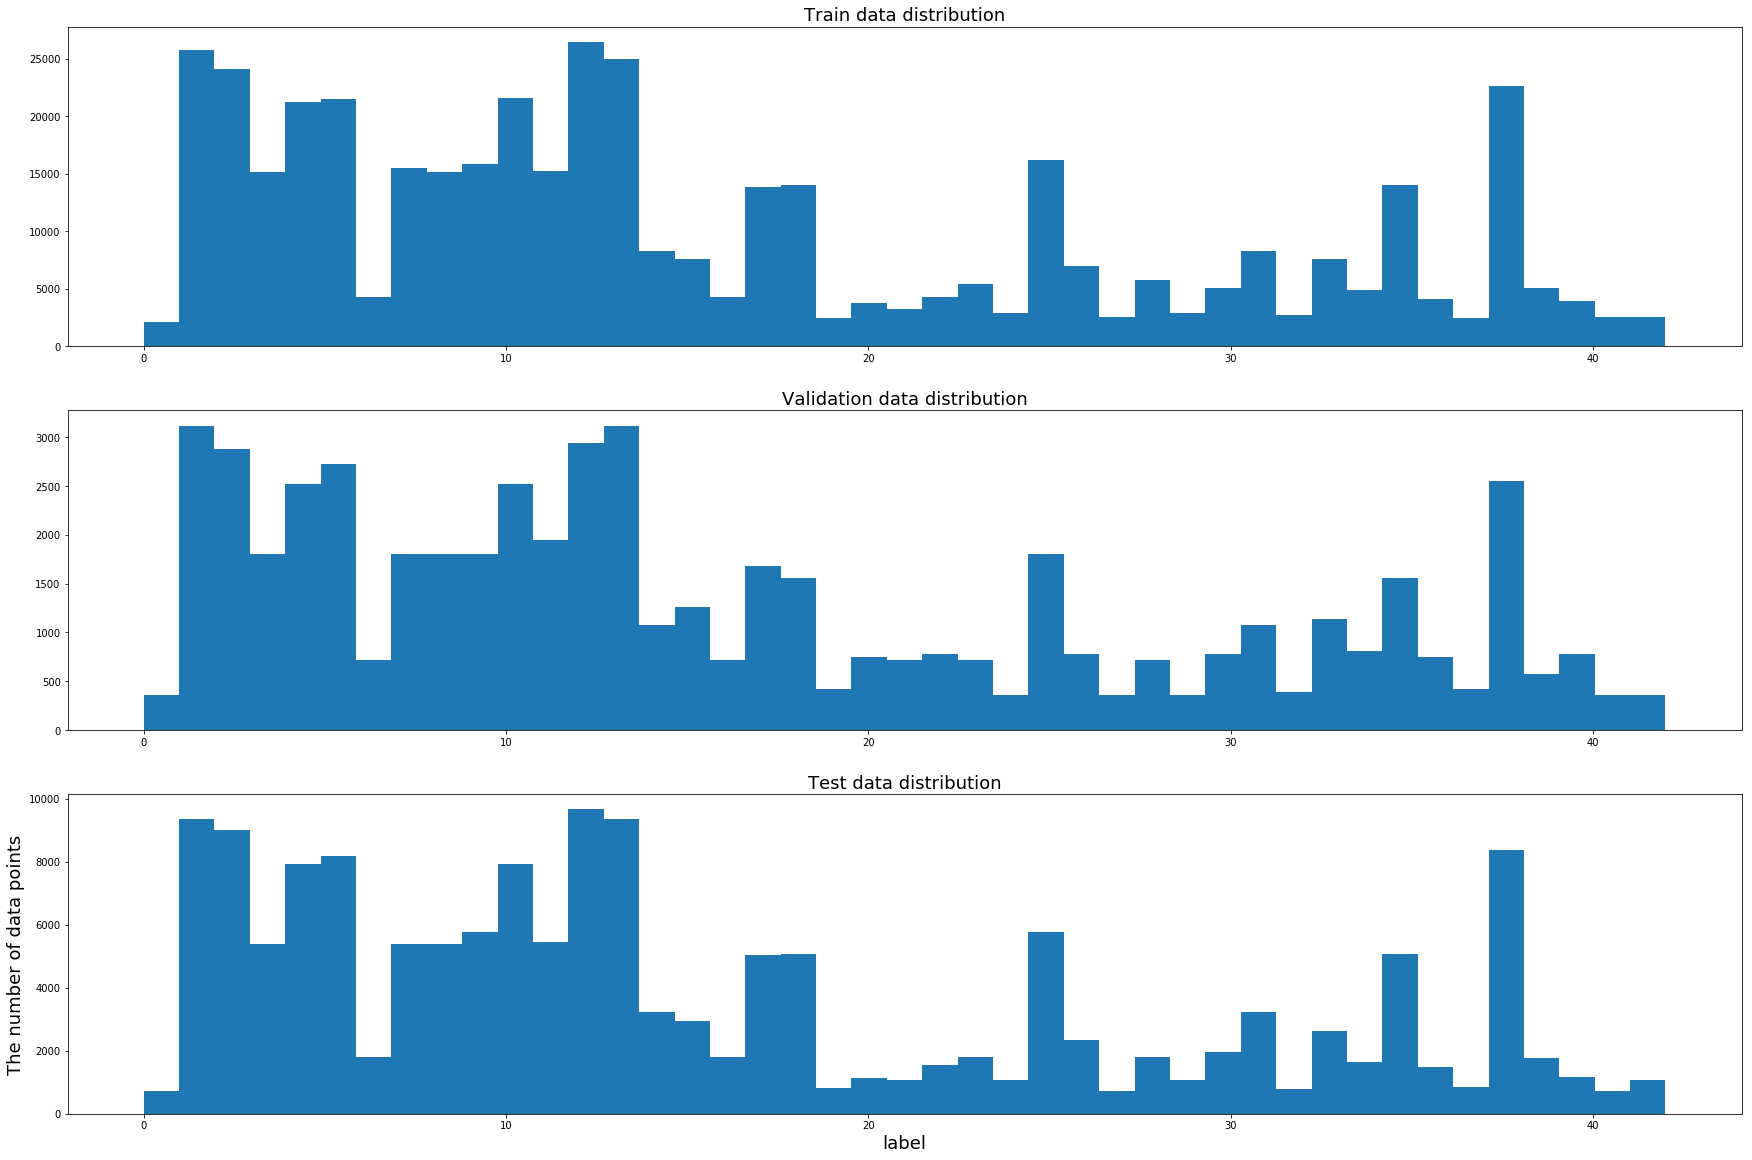

In [76]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_valid = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = (32,32)

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

f,axes = plt.subplots(nrows=3, ncols=1,figsize=(30,20))
axes[0].hist(y_train, bins=n_classes)
axes[0].set_title("Train data distribution",fontsize=18)
plt.xlabel('label',fontsize=18)
plt.ylabel('The number of data points',fontsize=18)
axes[1].hist(y_valid, bins=n_classes)
axes[1].set_title("Validation data distribution",fontsize=18)
axes[2].hist(y_test, bins=n_classes)
axes[2].set_title("Test data distribution",fontsize=18)
f.savefig('data_distribution_with_data_augumentation.png')

In [35]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle

def pre_process_with_generator(X,y):
    # normalize the data
    X_normalized = (X-[128])/128
    # rgb to gray
    X_processed = np.mean(X_normalized,axis=3).reshape((X.shape[0],X.shape[1],X.shape[2],1))
    # padding around edge
    X_processed = np.pad(X_processed, ((0,0),(2,2),(2,2),(0,0)), 'constant')
    return X_processed,y
def pre_process_keep_rgb_with_generator(X,y):
    # normalize the data
    X_normalized = (X-[128])/128
    # padding around edge
    X_processed = np.pad(X_normalized, ((0,0),(2,2),(2,2),(0,0)), 'constant')
    return X_processed,y
"""
X,y=pre_process(X_train,y_train)
print(X.shape)
print(np.max(X))
"""

'\nX,y=pre_process(X_train,y_train)\nprint(X.shape)\nprint(np.max(X))\n'

In [36]:
# split data into image and steer angle
# Generator which is called per batch
from sklearn.utils import shuffle
def preprocess_generator(X_data,y_data,batch_size): # this input does not mean network input,just generator's input.
    data_length = len(y_data)
    X_shuffled , y_shuffled = shuffle(X_data,y_data)
    while 1:
        for offset in range(0,data_length,batch_size):
            X_batch_data = X_shuffled[offset:offset+batch_size]
            y_batch_data = y_data[offset:offset+batch_size]
            X_processed,y_processed = pre_process_with_generator(X_batch_data,y_batch_data)
            yield X_processed,y_processed
            
def preprocess_keep_rgb_generator(X_data,y_data,batch_size): # this input does not mean network input,just generator's input.
    data_length = len(y_data)
    X_shuffled , y_shuffled = shuffle(X_data,y_data)
    while 1:
        for offset in range(0,data_length,batch_size):
            X_batch_data = X_shuffled[offset:offset+batch_size]
            y_batch_data = y_shuffled[offset:offset+batch_size]
            X_processed,y_processed = pre_process_keep_rgb_with_generator(X_batch_data,y_batch_data)
            yield X_processed,y_processed

Training...
EPOCH 1 ...
Accuracy = 0.245
Cross entropy = 2.829
EPOCH 2 ...
Accuracy = 0.504
Cross entropy = 1.667
EPOCH 3 ...
Accuracy = 0.634
Cross entropy = 1.220
EPOCH 4 ...
Accuracy = 0.702
Cross entropy = 1.001
EPOCH 5 ...
Accuracy = 0.749
Cross entropy = 0.866
EPOCH 6 ...
Accuracy = 0.782
Cross entropy = 0.759
EPOCH 7 ...
Accuracy = 0.803
Cross entropy = 0.706
EPOCH 8 ...
Accuracy = 0.825
Cross entropy = 0.638
EPOCH 9 ...
Accuracy = 0.837
Cross entropy = 0.608
EPOCH 10 ...
Accuracy = 0.848
Cross entropy = 0.586
EPOCH 11 ...
Accuracy = 0.858
Cross entropy = 0.547
EPOCH 12 ...
Accuracy = 0.865
Cross entropy = 0.530
EPOCH 13 ...
Accuracy = 0.873
Cross entropy = 0.506
EPOCH 14 ...
Accuracy = 0.879
Cross entropy = 0.484
EPOCH 15 ...
Accuracy = 0.883
Cross entropy = 0.489
EPOCH 16 ...
Accuracy = 0.887
Cross entropy = 0.474
EPOCH 17 ...
Accuracy = 0.894
Cross entropy = 0.449
EPOCH 18 ...
Accuracy = 0.894
Cross entropy = 0.458
EPOCH 19 ...
Accuracy = 0.894
Cross entropy = 0.474
EPOCH 20 

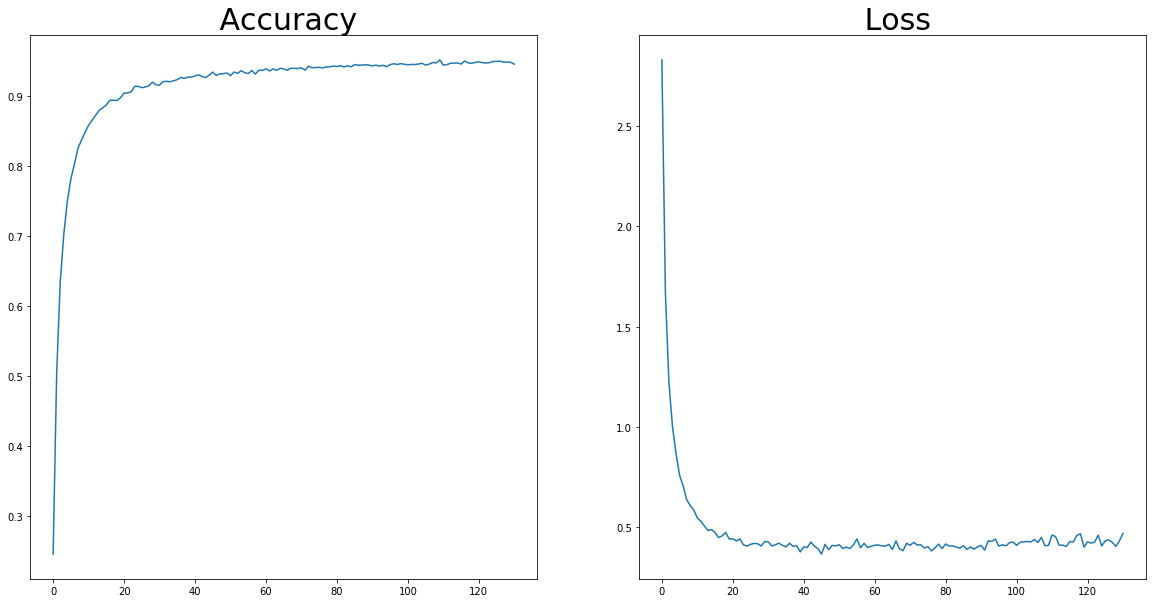

In [37]:
# Self difined CNN , with data augumentation

### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.



rate = 0.0001
EPOCHS=1000
BATCH_SIZE=1024
logits = self_difined_CNN_last_ver_(x,keep_prob_1,keep_prob_2)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
# to save result

parameter = {'accuracy_array' : np.array([]),
             'loss_array' : np.array([])}
# Model Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
def evaluation(X_eval,y_eval,is_rgb=0):
    sess = tf.get_default_session()
    total_ac = 0
    total_loss = 0
    if is_rgb == 0:
        data_gen = preprocess_generator(X_eval,y_eval,BATCH_SIZE)
    elif is_rgb == 1:
        data_gen = preprocess_keep_rgb_generator(X_eval,y_eval,BATCH_SIZE)
    #endif
    for offset in range(0, len(X_eval), BATCH_SIZE):
        batch_x, batch_y = data_gen.__next__()
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,keep_prob_1:0.8,keep_prob_2:0.5})
        loss     = sess.run(cross_entropy,feed_dict={x: batch_x, y: batch_y,keep_prob_1:0.8,keep_prob_2:0.5})
        mean_loss = np.mean(loss)
        total_ac += (accuracy * len(batch_x))
        total_loss += (mean_loss * len(batch_x)) 
    return total_ac/len(X_eval),total_loss/len(X_eval)

with tf.Session(config=configure) as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver(max_to_keep=100)
    print("Training...")
    for i in range(EPOCHS):
        ### early stopping
        if i>100:
            if ((parameter["accuracy_array"][i-1]-np.max(parameter["accuracy_array"])) < -0.02):
                break
            elif ((np.max(parameter["accuracy_array"][i-21:i-1])-np.max(parameter["accuracy_array"][i-41:i-21])) <= 0.0):
                break
            #endif
        #endif

        if is_rgb == 0:
            train_data_gen = preprocess_generator(X_train,y_train,BATCH_SIZE)
        elif is_rgb == 1:
            train_data_gen = preprocess_keep_rgb_generator(X_train,y_train,BATCH_SIZE)
        for offset in range(0,n_train,BATCH_SIZE):
            batch_x, batch_y = train_data_gen.__next__()
            sess.run(training_operation, feed_dict={x:batch_x, y:batch_y,keep_prob_1:0.8,keep_prob_2:0.5})
        #endofor
        print("EPOCH {} ...".format(i+1))
        valid_ac,valid_loss = evaluation(X_valid, y_valid,is_rgb)
        parameter["accuracy_array"] = np.append(parameter["accuracy_array"],valid_ac)
        parameter["loss_array"] = np.append(parameter["loss_array"],valid_loss)
        print("Accuracy = {:.3f}".format(valid_ac))
        print("Cross entropy = {:.3f}".format(valid_loss))
        saver.save(sess, './self_difined_CNN_last_ver_with_data_augumentation_is_rgb{0}_{1}th_epoch'.format(is_rgb,i+1))
    #endfor
    
    #save best model.

    #endwith
    ind = np.argmax(parameter["accuracy_array"])

    print("Best epoch is {0}".format(ind+1))
    saver.restore(sess,'./self_difined_CNN_last_ver_with_data_augumentation_is_rgb{0}_{1}th_epoch'.format(is_rgb,ind+1))
    

    valid_ac,valid_loss = evaluation(X_valid, y_valid,is_rgb)
    saver.save(sess, './self_difined_CNN_last_ver_with_data_augumentation_is_rgb{0}'.format(is_rgb))
    print("Best Model Accuracy = {:.3f}".format(valid_ac))
    


    if is_rgb==0:
        f_1, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,10))
        ax1.plot(parameter["accuracy_array"] )
        ax1.set_title(' Accuracy', fontsize=30)
        ax2.plot(parameter["loss_array"])
        ax2.set_title(' Loss', fontsize=30)
        f_1.savefig('self_difined_CNN_last_vew_with_data_augumentation_figure_epoch{0}_rate_{1}_batch{2}_is_rgb{3}.png'.format(EPOCHS,rate,BATCH_SIZE,is_rgb))
        print("Model saved")
    #endif
    if is_rgb==1:
        f_2, (ax3, ax4) = plt.subplots(1, 2,figsize=(20,10))
        ax3.plot(parameter["accuracy_array"] )
        ax3.set_title(' Accuracy', fontsize=30)
        ax4.plot(parameter["loss_array"])
        ax4.set_title(' Loss', fontsize=30)
        f_2.savefig('self_difined_CNN_last_ver_with_data_augumentation_figure_epoch{0}_rate_{1}_batch{2}_is_rgb{3}.png'.format(EPOCHS,rate,BATCH_SIZE,is_rgb))
        print("Model saved")
    #endif
#endwith

In [38]:
with tf.Session(config=configure) as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver(max_to_keep=100)
    saver.restore(sess,'./self_difined_CNN_last_ver_with_data_augumentation_is_rgb1')
    train_ac,train_loss = evaluation(X_train, y_train,is_rgb)
    print("Train data Accuracy : {0}".format(train_ac))
    print("Train data Loss : {0}".format(train_loss))
    valid_ac,valid_loss = evaluation(X_valid, y_valid,is_rgb)
    print("Valid data Accuracy : {0}".format(valid_ac))
    print("Valid data Loss : {0}".format(valid_loss))
    test_ac,test_loss = evaluation(X_test, y_test,is_rgb)
    print("Test data Accuracy : {0}".format(test_ac))
    print("Test data Loss : {0}".format(test_loss))
    saver.save(sess, 'self_difined_CNN_last_ver_with_data_augumentation_is_rgb1')

INFO:tensorflow:Restoring parameters from ./self_difined_CNN_last_ver_with_data_augumentation_is_rgb1
Train data Accuracy : 0.9978299332487207
Train data Loss : 0.006321019644243348
Valid data Accuracy : 0.9508261492882651
Valid data Loss : 0.4036143529004064
Test data Accuracy : 0.9327749545514804
Test data Loss : 0.5342465304477249


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

['/home/nishi/udacity/CarND-Traffic-Sign-Classifier-Project/new_image_from_web_site/image_1.jpg'
 '/home/nishi/udacity/CarND-Traffic-Sign-Classifier-Project/new_image_from_web_site/image_2.jpg'
 '/home/nishi/udacity/CarND-Traffic-Sign-Classifier-Project/new_image_from_web_site/image_3.jpg'
 '/home/nishi/udacity/CarND-Traffic-Sign-Classifier-Project/new_image_from_web_site/image_4.jpg'
 '/home/nishi/udacity/CarND-Traffic-Sign-Classifier-Project/new_image_from_web_site/image_5.jpg'
 '/home/nishi/udacity/CarND-Traffic-Sign-Classifier-Project/new_image_from_web_site/image_6.jpg'
 '/home/nishi/udacity/CarND-Traffic-Sign-Classifier-Project/new_image_from_web_site/image_7.jpg']
7
(1, 32, 32, 3)
(1, 32, 32, 3)
(1, 32, 32, 3)
(1, 32, 32, 3)
(1, 32, 32, 3)
(1, 32, 32, 3)
(1, 32, 32, 3)
(7, 32, 32, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


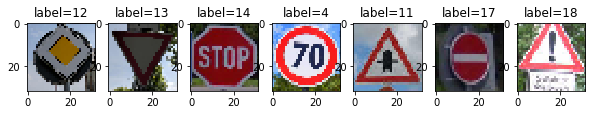

In [39]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import glob
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image
# Visualizations will be shown in the notebook.
%matplotlib inline
file_name = '/home/nishi/udacity/CarND-Traffic-Sign-Classifier-Project/new_image_from_web_site/new_image_label.txt'
labels = np.array([])
with open(file_name) as f:
    for line in f.readlines():
        for label in line.split():
             labels = np.append(labels, int(label))
        #Endfor
    #endfor
#endwith
n_image = len(labels)
image_dir_name = "/home/nishi/udacity/CarND-Traffic-Sign-Classifier-Project/new_image_from_web_site/"
image_file_names=np.array([])
for i in range(len(labels)):
    image_file_names = np.append(image_file_names,image_dir_name+"image_{0}.jpg".format(i+1))
print(image_file_names)
print(len(image_file_names))

for i in range(n_image):
    image = Image.open(image_file_names[i])
    image = np.array(image.resize((32,32)))
    image = image.reshape(1,32,32,3).astype(np.uint8)
    print(image.shape)
    if i == 0:
        new_images = image
    else:
        new_images = np.concatenate((new_images,image),axis=0)
print(new_images.shape)
f,ax = plt.subplots(nrows=1,ncols=n_image,figsize=(10,10))
for i in range(n_image):
    print(type(ax))
    ax[i].imshow(new_images[i])
    ax[i].set_title("label={0}".format(int(labels[i])))
#endfor

### Predict the Sign Type for Each Image

In [42]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.


## data preprocess
### gray_ver ###
if is_rgb == 0:
    X_processed , y_processed = pre_process(new_images,labels)
#endif
################
### rgb_ver ###
else:
    X_processed , y_processed = pre_process_keep_rgb(new_images,labels)
#endif
###############
with tf.Session(config=configure) as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver(max_to_keep=100)
    saver.restore(sess,'./self_difined_CNN_last_ver_with_data_augumentation_is_rgb1')
    train_ac,train_loss = evaluation(new_images,labels,is_rgb)
    logit= sess.run(logits,feed_dict={x:X_processed,keep_prob_1:0.8,keep_prob_2:0.5})
    logit = sess.run(tf.nn.softmax(logit))
    matrix = sess.run(tf.nn.top_k(logit, k=5))
    print(logit.shape)
    predict_result = sess.run(tf.argmax(logit, 1))
    print("Result of prediction is \n", predict_result)
    print(predict_result)
    answer = y_processed.astype(int)
    print(y_processed)
    result = (predict_result==answer)
    print(result)
    print('accuracy:',train_ac,'\n loss:',train_loss)
    print(matrix)
    saver.save(sess, 'self_difined_CNN_last_ver_with_data_augumentation_is_rgb1')

INFO:tensorflow:Restoring parameters from ./self_difined_CNN_last_ver_with_data_augumentation_is_rgb1
(7, 43)
Result of prediction is 
 [12 14  4 11  1 13 17]
[12 14  4 11  1 13 17]
[12. 14.  4. 11. 18. 13. 17.]
[ True  True  True  True False  True  True]
accuracy: 0.7142857313156128 
 loss: 6.21361780166626
TopKV2(values=array([[1.0000000e+00, 1.4676754e-20, 2.4207640e-22, 4.4589230e-23,
        4.0497333e-23],
       [1.0000000e+00, 1.6596096e-11, 9.6278500e-15, 1.4812287e-15,
        3.6836285e-22],
       [9.9899894e-01, 5.3660473e-04, 4.6450074e-04, 2.5267473e-08,
        2.1712198e-08],
       [1.0000000e+00, 3.3059397e-15, 1.1534152e-22, 5.6658332e-25,
        1.7980049e-30],
       [1.0000000e+00, 4.0582767e-12, 2.2816204e-16, 1.5968179e-17,
        5.2997405e-19],
       [1.0000000e+00, 8.4389735e-18, 1.2539788e-24, 6.1453492e-25,
        1.5807078e-26],
       [1.0000000e+00, 1.8026542e-15, 5.1076352e-32, 1.1478076e-34,
        3.5376246e-36]], dtype=float32), indices=array([

In [40]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.


## data preprocess
### gray_ver ###
if is_rgb == 0:
    X_processed , y_processed = pre_process(new_images,labels)
#endif
################
### rgb_ver ###
else:
    X_processed , y_processed = pre_process_keep_rgb(new_images,labels)
#endif
###############
with tf.Session(config=configure) as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver(max_to_keep=100)
    saver.restore(sess,'./self_difined_CNN_last_ver_with_data_augumentation_is_rgb1')
    train_ac,train_loss = evaluation(new_images,labels,is_rgb)
    logit= sess.run(logits,feed_dict={x:X_processed,keep_prob_1:0.8,keep_prob_2:0.5})
    matrix = sess.run(tf.nn.top_k(logit, k=5))
    print(logit.shape)
    predict_result = sess.run(tf.argmax(logit, 1))
    print("Result of prediction is \n", predict_result)
    print(predict_result)
    answer = y_processed.astype(int)
    print(y_processed)
    result = (predict_result==answer)
    print(result)
    print('accuracy:',train_ac,'\n loss:',train_loss)
    print(matrix)
    saver.save(sess, 'self_difined_CNN_last_ver_with_data_augumentation_is_rgb1')

INFO:tensorflow:Restoring parameters from ./self_difined_CNN_last_ver_with_data_augumentation_is_rgb1
(7, 43)
Result of prediction is 
 [13 17 12 11  4  1 14]
[13 17 12 11  4  1 14]
[13. 17. 12. 11.  4. 18. 14.]
[ True  True  True  True  True False  True]
accuracy: 0.7142857313156128 
 loss: 5.300605773925781
TopKV2(values=array([[63.023106 , 35.612072 , 19.285803 , 16.682985 , 12.575516 ],
       [88.865395 , 50.39081  , 20.514902 , 16.890305 , 12.230587 ],
       [42.812622 ,  7.465993 ,  7.043345 ,  6.6981463,  6.473225 ],
       [66.15769  , 47.55789  , 35.841038 , 25.62472  , 25.125881 ],
       [43.131462 , 33.28991  , 15.458265 , 12.889167 , 11.59786  ],
       [68.127335 , 20.141672 , 16.095385 , 11.980253 , 10.513879 ],
       [80.828445 , 39.759716 , 24.164457 , 24.151339 , 20.730047 ]],
      dtype=float32), indices=array([[13, 15,  9,  3, 10],
       [17, 14,  0,  5, 26],
       [12, 26, 10, 15, 42],
       [11, 30,  1, 28, 27],
       [ 4,  1,  7,  0, 18],
       [ 1,  2, 

### Analyze Performance

In [41]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
accuracy_percentage = np.array(result).astype(int).sum(axis=0)/len(result) * 100
print("Accuracy = {0}%".format(accuracy_percentage))

Accuracy = 85.71428571428571%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
print(np.array(matrix).shape)

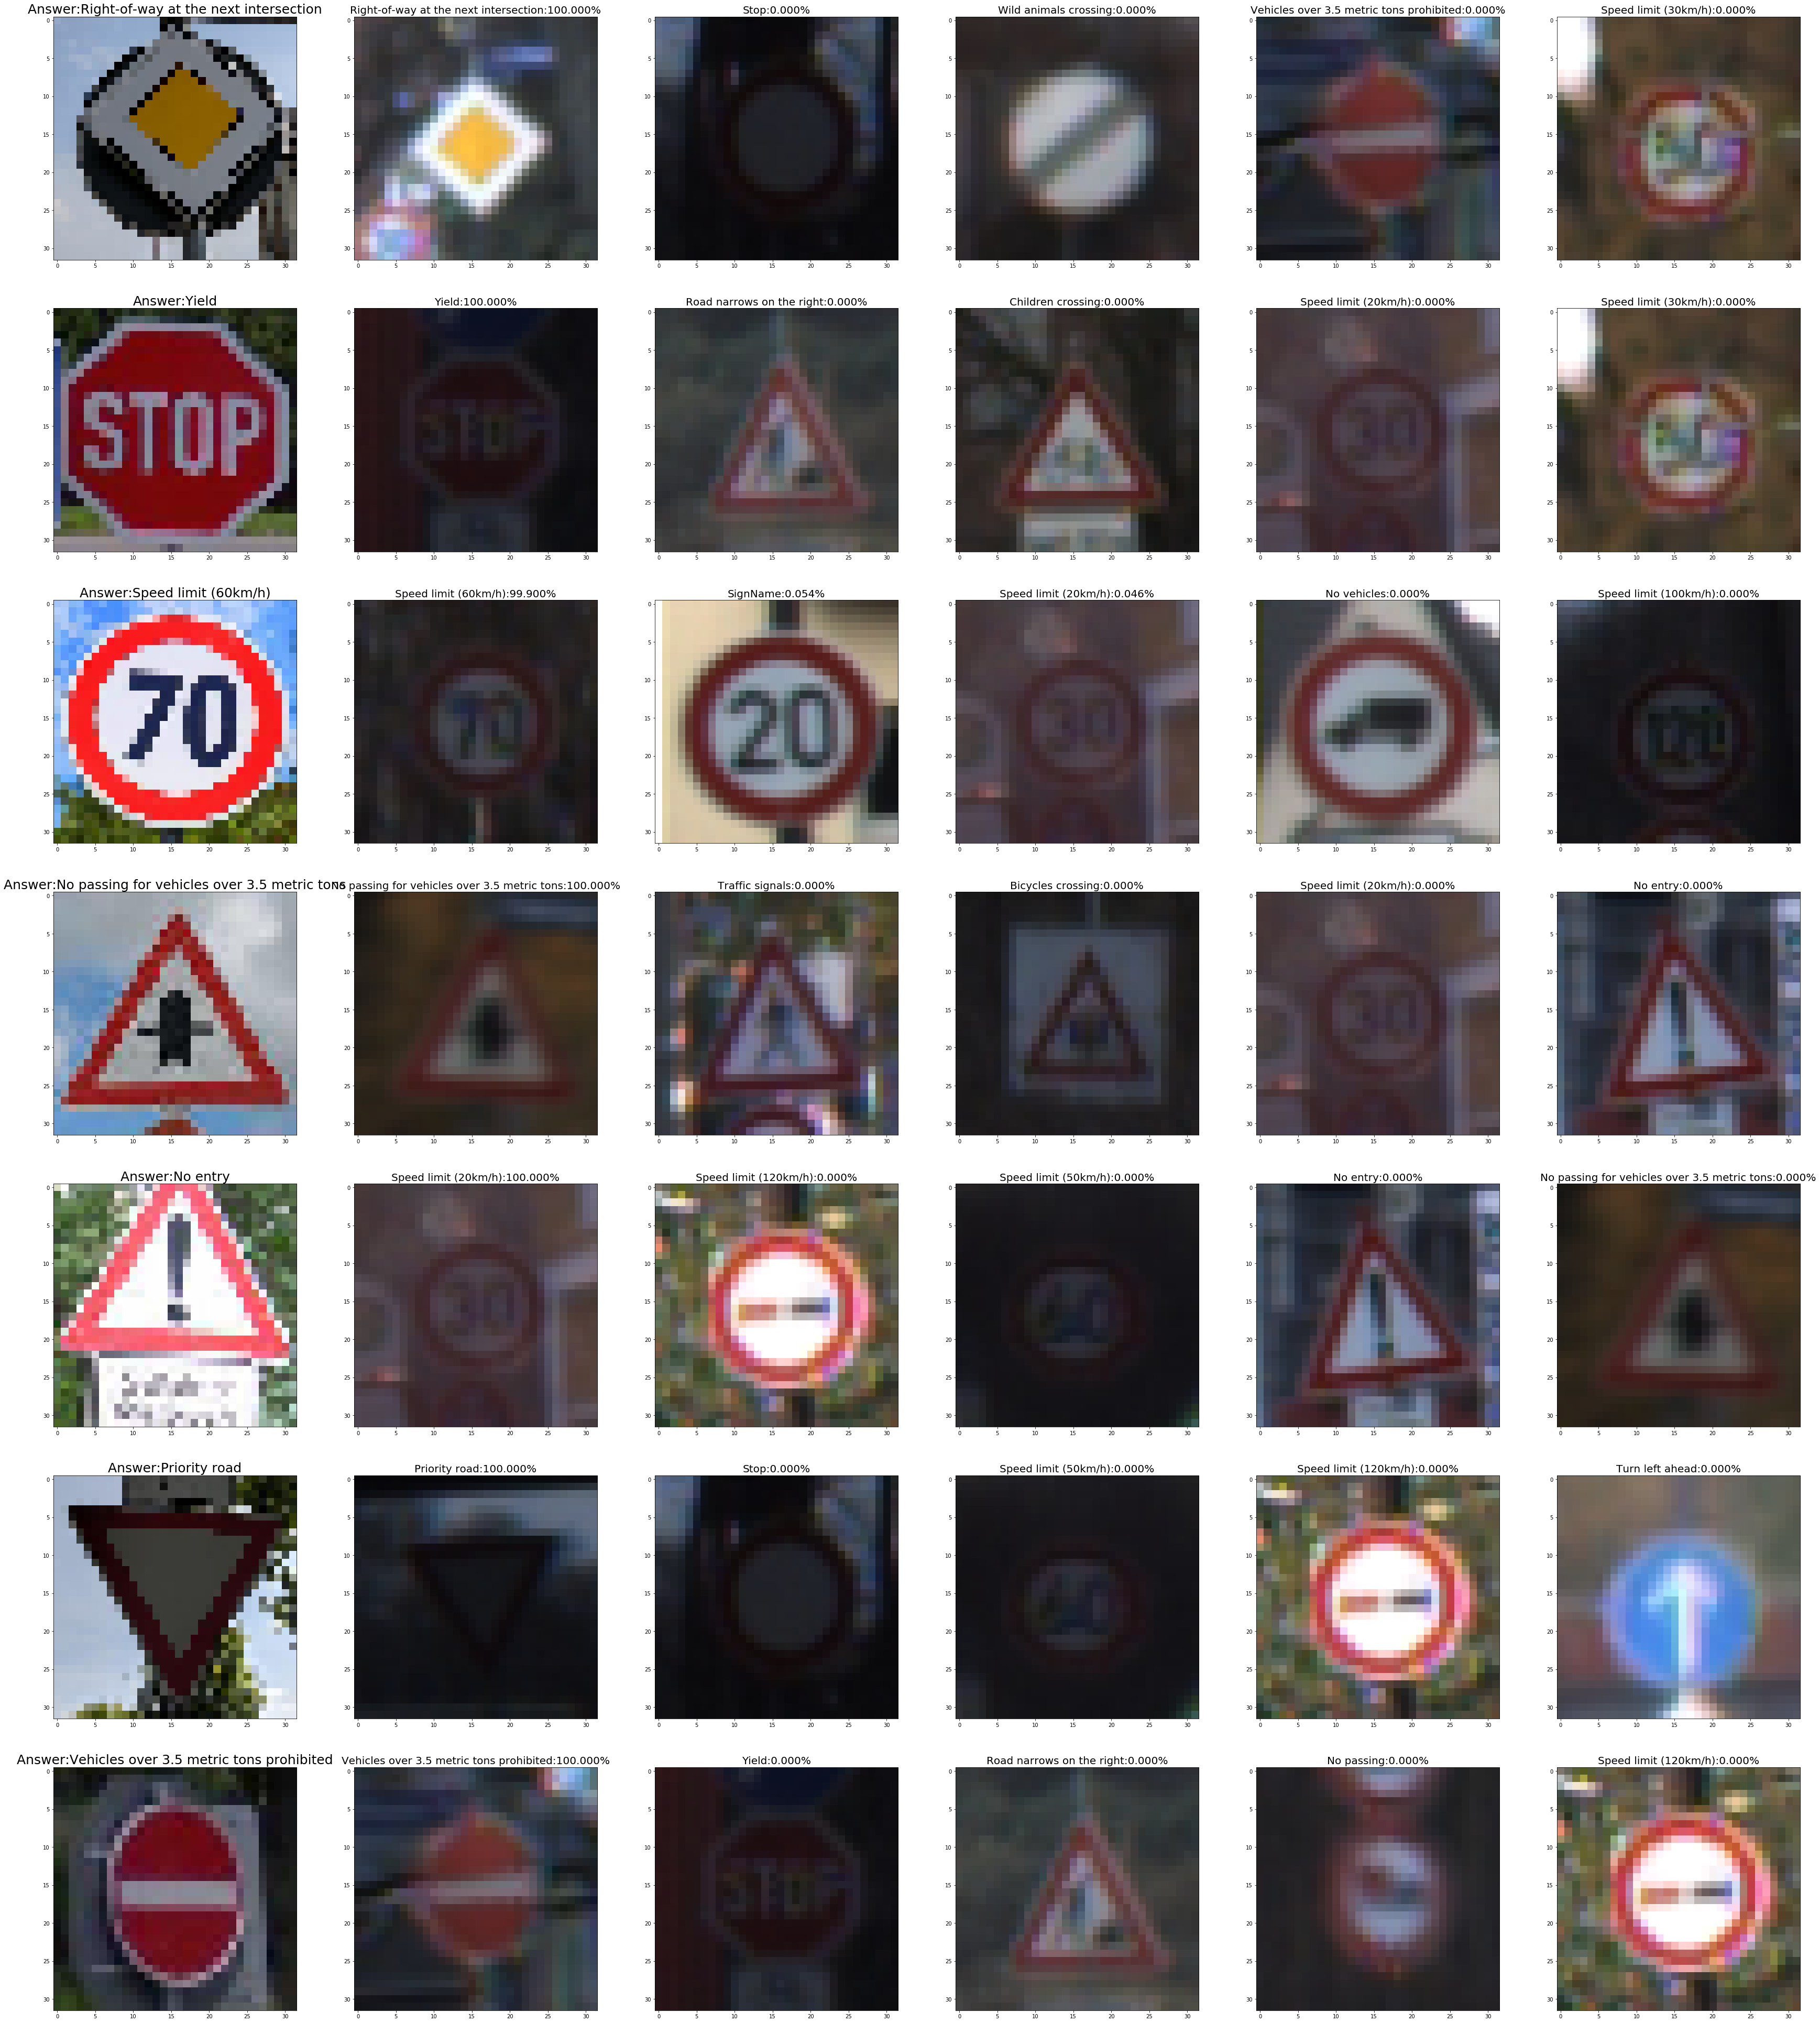

In [46]:
matrix = np.array(matrix)
f,axes = plt.subplots(nrows=matrix.shape[1],ncols=6,figsize=(60,70))
for i in range(matrix.shape[1]):
    base_ind = np.where(np.array(labels)==int(y_processed[i]))
    base_ind = base_ind[0][0]
    axes[i][0].imshow(new_images[base_ind])
    axes[i][0].set_title("Answer:{0}".format(all_labels[int(y_processed[i])]),fontsize=25)
    for j in range(1,6,1):
        ind = np.min(np.where(y_train==matrix[1,i,j-1]))
        axes[i][j].imshow(X_train[ind])
        axes[i][j].set_title("{0}:{1:.3f}%".format(all_labels[int(matrix[1,i,j-1])],float(matrix[0,i,j-1]*100)),fontsize=20)
f.savefig("prediction_test_result_with_data_augumentation.png")
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

In [86]:
A = [[13, 15,  9,  3, 10],
       [17, 14,  0,  5, 26],
       [12, 26, 10, 15, 42],
       [11, 30,  1, 28, 27],
       [ 4,  1,  7,  0, 18],
       [ 1,  2, 18,  9, 13],
       [14,  1,  5,  2,  3]]

B = [[1.0000000e+00, 1.4676754e-20, 2.4207640e-22, 4.4589230e-23,
        4.0497333e-23],
       [1.0000000e+00, 1.6596096e-11, 9.6278500e-15, 1.4812287e-15,
        3.6836285e-22],
       [9.9899894e-01, 5.3660473e-04, 4.6450074e-04, 2.5267473e-08,
        2.1712198e-08],
       [1.0000000e+00, 3.3059397e-15, 1.1534152e-22, 5.6658332e-25,
        1.7980049e-30],
       [1.0000000e+00, 4.0582767e-12, 2.2816204e-16, 1.5968179e-17,
        5.2997405e-19],
       [1.0000000e+00, 8.4389735e-18, 1.2539788e-24, 6.1453492e-25,
        1.5807078e-26],
       [1.0000000e+00, 1.8026542e-15, 5.1076352e-32, 1.1478076e-34,
        3.5376246e-36]]
Correct_answer = np.array([12, 14,  4, 11, 18, 13, 17]).astype(int)
print("|Correct Answer|Prediction result (top five)|")
for i in range(len(A)):
    
    
    print("|{0}|{1}:{2:.3f}%,{3}:{4:.3f}%,{5}:{6:.3f}%,{7}:{8:.3f}%,{9}:{10:.3f}%|".format(all_labels[Correct_answer[i]],
                                                                                           all_labels[A[i][0]],B[i][0]*100,
                                                                                           all_labels[A[i][1]],B[i][1]*100,
                                                                                           all_labels[A[i][2]],B[i][2]*100,
                                                                                           all_labels[A[i][3]],B[i][3]*100,
                                                                                           all_labels[A[i][4]],B[i][4]*100))

|Correct Answer|Prediction result (top five)|
|Priority road|Yield:100.000%,No vehicles:0.000%,No passing:0.000%,Speed limit (60km/h):0.000%,No passing for vehicles over 3.5 metric tons:0.000%|
|Stop|No entry:100.000%,Stop:0.000%,Speed limit (20km/h):0.000%,Speed limit (80km/h):0.000%,Traffic signals:0.000%|
|Speed limit (70km/h)|Priority road:99.900%,Traffic signals:0.054%,No passing for vehicles over 3.5 metric tons:0.046%,No vehicles:0.000%,End of no passing by vehicles over 3.5 metric tons:0.000%|
|Right-of-way at the next intersection|Right-of-way at the next intersection:100.000%,Beware of ice/snow:0.000%,Speed limit (30km/h):0.000%,Children crossing:0.000%,Pedestrians:0.000%|
|General caution|Speed limit (70km/h):100.000%,Speed limit (30km/h):0.000%,Speed limit (100km/h):0.000%,Speed limit (20km/h):0.000%,General caution:0.000%|
|Yield|Speed limit (30km/h):100.000%,Speed limit (50km/h):0.000%,General caution:0.000%,No passing:0.000%,Yield:0.000%|
|No entry|Stop:100.000%,Speed li

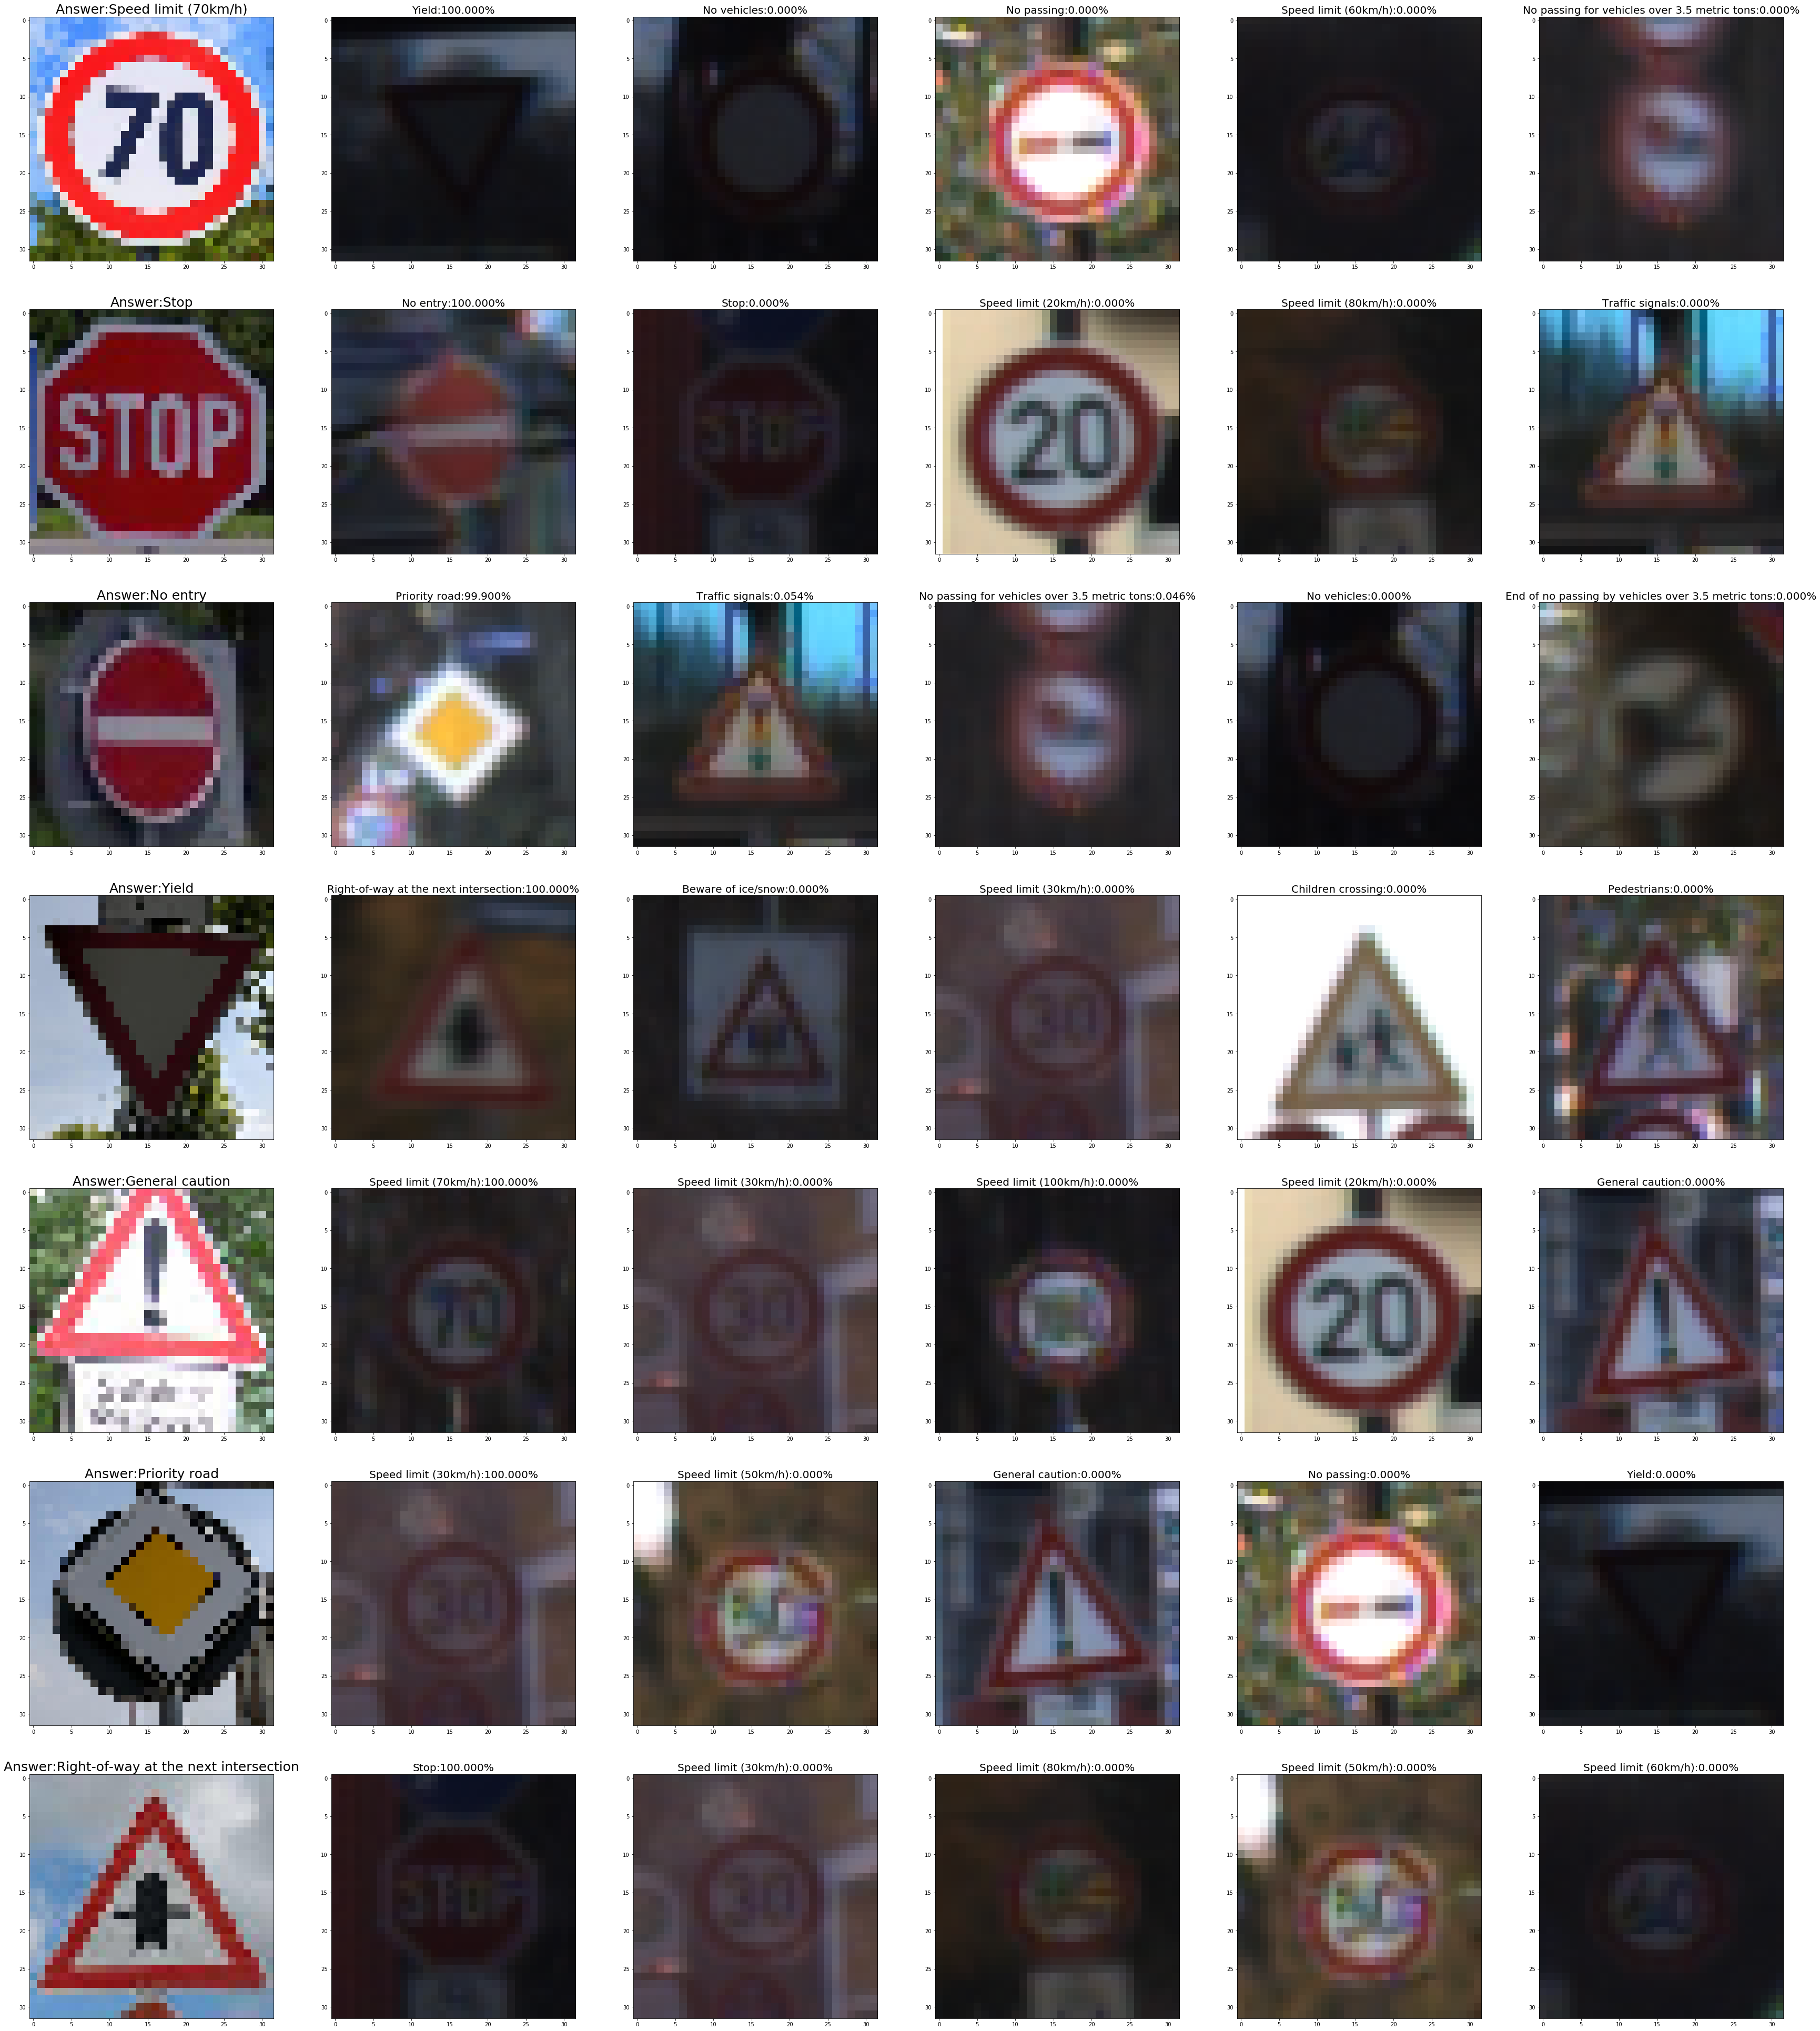

In [87]:
matrix = np.array(matrix)
f,axes = plt.subplots(nrows=matrix.shape[1],ncols=6,figsize=(60,70))
for i in range(matrix.shape[1]):
    base_ind = np.where(np.array(labels)==int(y_processed[i]))
    base_ind = base_ind[0][0]
    axes[i][0].imshow(new_images[base_ind])
    axes[i][0].set_title("Answer:{0}".format(all_labels[int(y_processed[i])]),fontsize=25)
    for j in range(1,6,1):
        ind = np.min(np.where(y_train==A[i][j-1]))
        axes[i][j].imshow(X_train[ind])
        axes[i][j].set_title("{0}:{1:.3f}%".format(all_labels[A[i][j-1]],float(B[i][j-1]*100)),fontsize=20)
f.savefig("prediction_test_result_with_data_augumentation2.png")